In [90]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
from scipy import stats
import matplotlib
import cartopy
import cartopy.crs as ccrs
import pickle
import os.path
from cartopy.util import add_cyclic_point
import warnings
from scipy import stats
warnings.filterwarnings("ignore")

In [159]:
#mymodels = ["ACCESS-ESM1-5", "CAMS-CSM1-0", "CESM2-WACCM", "CanESM5", "GFDL-ESM4", "HadGEM3-GC31-LL", "INM-CM5-0",\
#            "MPI-ESM1-2-LR", "UKESM1-0-LL", "AWI-ESM-1-1-LR", "CAS-ESM2-0", "CMCC-ESM2", "E3SM-1-1",\
#            "GISS-E2-1-G", "IITM-ESM", "IPSL-CM6A-LR", "MRI-ESM2-0", "SAM0-UNICON", "BCC-ESM1", "CESM2", \
#            "CNRM-ESM2-1", "EC-Earth3", "GISS-E2-2-G", "INM-CM4-8", "MIROC-ES2L", "NESM3", "TaiESM1"]
mymodels = ["ACCESS-ESM1-5", "CESM2-WACCM", "CanESM5", "GFDL-ESM4", "HadGEM3-GC31-LL", "INM-CM5-0",\
            "MPI-ESM1-2-LR", "UKESM1-0-LL", "AWI-ESM-1-1-LR", "CAS-ESM2-0", "CMCC-ESM2", "E3SM-1-1",\
            "GISS-E2-1-G", "IITM-ESM", "IPSL-CM6A-LR", "MRI-ESM2-0", "SAM0-UNICON", "BCC-ESM1", "CESM2", \
            "CNRM-ESM2-1", "EC-Earth3", "GISS-E2-2-G", "INM-CM4-8", "MIROC-ES2L", "NESM3", "TaiESM1"]
nmodel = len(mymodels)
lat = {}
lon = {}
lwu_C = {}
swu_C = {}
lwd_C = {}
swd_C = {}
sh_C = {}
lh_C = {}
lwu_585 = {}
swu_585 = {}
lwd_585 = {}
swd_585 = {}
sh_585 = {}
lh_585 = {}
lwu_4X = {}
swu_4X = {}
lwd_4X = {}
swd_4X = {}
sh_4X = {}
lh_4X = {}

In [161]:
#Grab Control
datadir = "/net/aeolus/aura/hansingh/CMIP/piControl/processed/"
for i in range(0,nmodel):
    print("Working on "+mymodels[i])
    if os.path.exists(datadir+mymodels[i]+"_rsus_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsus_piControl.nc", decode_times=False)
        swu_C[mymodels[i]]=myData.rsus[0,:,:].mean(axis=1)
        lat[mymodels[i]]=myData.lat
    if os.path.exists(datadir+mymodels[i]+"_rsds_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsds_piControl.nc", decode_times=False)
        swd_C[mymodels[i]]=myData.rsds[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_rlus_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlus_piControl.nc", decode_times=False)
        lwu_C[mymodels[i]]=myData.rlus[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_rlds_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlds_piControl.nc", decode_times=False)
        lwd_C[mymodels[i]]=myData.rlds[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_hfss_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_hfss_piControl.nc", decode_times=False)
        sh_C[mymodels[i]]=myData.hfss[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_hfls_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_hfls_piControl.nc", decode_times=False)
        lh_C[mymodels[i]]=myData.hfls[0,:,:].mean(axis=1)
        
#Grab 4XCO2
yrstr = "yrs2070-2100"
datadir = "/net/aeolus/aura/hansingh/CMIP/ssp585/processed/"
for i in range(0,nmodel):
    print("Working on "+mymodels[i])
    if os.path.exists(datadir+mymodels[i]+"_rsus_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsus_ssp585_"+yrstr+".nc", decode_times=False)
        swu_585[mymodels[i]]=myData.rsus[0,:,:].mean(axis=1)
        lat[mymodels[i]]=myData.lat
    if os.path.exists(datadir+mymodels[i]+"_rsds_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsds_ssp585_"+yrstr+".nc", decode_times=False)
        swd_585[mymodels[i]]=myData.rsds[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_rlus_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlus_ssp585_"+yrstr+".nc", decode_times=False)
        lwu_585[mymodels[i]]=myData.rlus[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_rlds_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlds_ssp585_"+yrstr+".nc", decode_times=False)
        lwd_585[mymodels[i]]=myData.rlds[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_hfss_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_hfss_ssp585_"+yrstr+".nc", decode_times=False)
        sh_585[mymodels[i]]=myData.hfss[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_hfls_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_hfls_ssp585_"+yrstr+".nc", decode_times=False)
        lh_585[mymodels[i]]=myData.hfls[0,:,:].mean(axis=1)
        
#Grab 4XCO2
yrstr = "yrs100-150"
datadir = "/net/aeolus/aura/hansingh/CMIP/abrupt4XCO2/processed/"
for i in range(0,nmodel):
    print("Working on "+mymodels[i])
    if os.path.exists(datadir+mymodels[i]+"_rsus_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsus_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        swu_4X[mymodels[i]]=myData.rsus[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_rsds_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsds_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        swd_4X[mymodels[i]]=myData.rsds[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_rlus_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlus_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        lwu_4X[mymodels[i]]=myData.rlus[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_rlds_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlds_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        lwd_4X[mymodels[i]]=myData.rlds[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_hfss_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_hfss_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        sh_4X[mymodels[i]]=myData.hfss[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_hfls_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_hfls_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        lh_4X[mymodels[i]]=myData.hfls[0,:,:].mean(axis=1)

Working on ACCESS-ESM1-5
Working on CESM2-WACCM
Working on CanESM5
Working on GFDL-ESM4
Working on HadGEM3-GC31-LL
Working on INM-CM5-0
Working on MPI-ESM1-2-LR
Working on UKESM1-0-LL
Working on AWI-ESM-1-1-LR
Working on CAS-ESM2-0
Working on CMCC-ESM2
Working on E3SM-1-1
Working on GISS-E2-1-G
Working on IITM-ESM
Working on IPSL-CM6A-LR
Working on MRI-ESM2-0
Working on SAM0-UNICON
Working on BCC-ESM1
Working on CESM2
Working on CNRM-ESM2-1
Working on EC-Earth3
Working on GISS-E2-2-G
Working on INM-CM4-8
Working on MIROC-ES2L
Working on NESM3
Working on TaiESM1
Working on ACCESS-ESM1-5
Working on CESM2-WACCM
Working on CanESM5
Working on GFDL-ESM4
Working on HadGEM3-GC31-LL
Working on INM-CM5-0
Working on MPI-ESM1-2-LR
Working on UKESM1-0-LL
Working on AWI-ESM-1-1-LR
Working on CAS-ESM2-0
Working on CMCC-ESM2
Working on E3SM-1-1
Working on GISS-E2-1-G
Working on IITM-ESM
Working on IPSL-CM6A-LR
Working on MRI-ESM2-0
Working on SAM0-UNICON
Working on BCC-ESM1
Working on CESM2
Working on

In [163]:
print(len(lh_585))
print(lh_4X["EC-Earth3"])

18
<xarray.DataArray 'hfls' (lat: 256)>
array([-5.84974527e-01, -6.62878633e-01, -6.19179487e-01, -3.02872211e-01,
       -1.22229829e-01, -5.70618808e-02,  1.46970999e+00,  2.01803923e+00,
        1.17971444e+00,  5.81555605e-01,  2.92768180e-01,  1.66895732e-01,
        1.16685644e-01,  1.04642808e-01,  4.05264467e-01,  1.08176517e+00,
        3.87038994e+00,  6.64323235e+00,  8.17619991e+00,  7.83709145e+00,
        9.05633545e+00,  1.06223698e+01,  1.18622885e+01,  1.27285824e+01,
        1.41260662e+01,  1.51078196e+01,  1.67043686e+01,  1.76816292e+01,
        1.94833679e+01,  2.12721004e+01,  2.30667610e+01,  2.62115974e+01,
        2.75457745e+01,  2.92771339e+01,  2.88386097e+01,  2.87657318e+01,
        2.96395912e+01,  2.89721489e+01,  3.01189423e+01,  3.07282600e+01,
        3.28672409e+01,  3.40029144e+01,  3.63770065e+01,  3.71420593e+01,
        3.78414688e+01,  4.01304016e+01,  4.19243698e+01,  4.31879501e+01,
        4.54011536e+01,  4.85581741e+01,  5.02881088e+01,  5

In [164]:
#Consolidate some fields
swnet_C = {}
lwnet_C = {}
sfcnet_C = {}
swnet_585 = {}
lwnet_585 = {}
sfcnet_585 = {}
swnet_4X = {}
lwnet_4X = {}
sfcnet_4X = {}

for i in range(0,nmodel):
    if (mymodels[i] in swu_C)&(mymodels[i] in swd_C):
        swnet_C[mymodels[i]] = swd_C[mymodels[i]]-swu_C[mymodels[i]]
        if np.max(swnet_C[mymodels[i]])<0.: #Correct models with incorrect sign convention!!!
            swnet_C[mymodels[i]] = -1.*swnet_C[mymodels[i]]
        lwnet_C[mymodels[i]] = lwu_C[mymodels[i]]-lwd_C[mymodels[i]]
        sfcnet_C[mymodels[i]] = swnet_C[mymodels[i]]-lwnet_C[mymodels[i]]-sh_C[mymodels[i]]-lh_C[mymodels[i]]
    if (mymodels[i] in swu_585)&(mymodels[i] in swd_585):
        swnet_585[mymodels[i]] = swd_585[mymodels[i]]-swu_585[mymodels[i]]
        if np.max(swnet_585[mymodels[i]])<0.: #Correct models with incorrect sign convention!!!
            swnet_585[mymodels[i]] = -1.*swnet_585[mymodels[i]]
        lwnet_585[mymodels[i]] = lwu_585[mymodels[i]]-lwd_585[mymodels[i]]
        sfcnet_585[mymodels[i]] = swnet_585[mymodels[i]]-lwnet_585[mymodels[i]]-sh_585[mymodels[i]]-lh_585[mymodels[i]]
    if (mymodels[i] in swu_4X)&(mymodels[i] in swd_4X):
        swnet_4X[mymodels[i]] = swd_4X[mymodels[i]]-swu_4X[mymodels[i]]
        if np.max(swnet_4X[mymodels[i]])<0.: #Correct models with incorrect sign convention!!!
            swnet_4X[mymodels[i]] = -1.*swnet_4X[mymodels[i]]
        lwnet_4X[mymodels[i]] = lwu_4X[mymodels[i]]-lwd_4X[mymodels[i]]
        sfcnet_4X[mymodels[i]] = swnet_4X[mymodels[i]]-lwnet_4X[mymodels[i]]-sh_4X[mymodels[i]]-lh_4X[mymodels[i]]

In [165]:
#Grab TOA Fluxes
toaswd_C = {}
toaswu_C = {}
toalwu_C = {}
toaswd_585 = {}
toaswu_585 = {}
toalwu_585 = {}
toaswd_4X = {}
toaswu_4X = {}
toalwu_4X = {}
#Grab Control
datadir = "/net/aeolus/aura/hansingh/CMIP/piControl/processed/"
for i in range(0,nmodel):
    print("Working on "+mymodels[i])
    if os.path.exists(datadir+mymodels[i]+"_rsut_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsut_piControl.nc", decode_times=False)
        toaswu_C[mymodels[i]]=myData.rsut[0,:,:].mean(axis=1)
        lat[mymodels[i]]=myData.lat
    if os.path.exists(datadir+mymodels[i]+"_rsdt_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsdt_piControl.nc", decode_times=False)
        toaswd_C[mymodels[i]]=myData.rsdt[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_rlut_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlut_piControl.nc", decode_times=False)
        toalwu_C[mymodels[i]]=myData.rlut[0,:,:].mean(axis=1)
        
datadir = "/net/aeolus/aura/hansingh/CMIP/ssp585/processed/"
yrstr = "yrs2070-2100"
for i in range(0,nmodel):
    print("Working on "+mymodels[i])
    if os.path.exists(datadir+mymodels[i]+"_rsut_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsut_ssp585_"+yrstr+".nc", decode_times=False)
        toaswu_585[mymodels[i]]=myData.rsut[0,:,:].mean(axis=1)
        lat[mymodels[i]]=myData.lat
    if os.path.exists(datadir+mymodels[i]+"_rsdt_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsdt_ssp585_"+yrstr+".nc", decode_times=False)
        toaswd_585[mymodels[i]]=myData.rsdt[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_rlut_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlut_ssp585_"+yrstr+".nc", decode_times=False)
        toalwu_585[mymodels[i]]=myData.rlut[0,:,:].mean(axis=1)
        
datadir = "/net/aeolus/aura/hansingh/CMIP/abrupt4XCO2/processed/"
yrstr = "yrs100-150"
for i in range(0,nmodel):
    print("Working on "+mymodels[i])
    if os.path.exists(datadir+mymodels[i]+"_rsut_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsut_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        toaswu_4X[mymodels[i]]=myData.rsut[0,:,:].mean(axis=1)
        lat[mymodels[i]]=myData.lat
    if os.path.exists(datadir+mymodels[i]+"_rsdt_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rsdt_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        toaswd_4X[mymodels[i]]=myData.rsdt[0,:,:].mean(axis=1)
    if os.path.exists(datadir+mymodels[i]+"_rlut_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_rlut_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        toalwu_4X[mymodels[i]]=myData.rlut[0,:,:].mean(axis=1)

Working on ACCESS-ESM1-5
Working on CESM2-WACCM
Working on CanESM5
Working on GFDL-ESM4
Working on HadGEM3-GC31-LL
Working on INM-CM5-0
Working on MPI-ESM1-2-LR
Working on UKESM1-0-LL
Working on AWI-ESM-1-1-LR
Working on CAS-ESM2-0
Working on CMCC-ESM2
Working on E3SM-1-1
Working on GISS-E2-1-G
Working on IITM-ESM
Working on IPSL-CM6A-LR
Working on MRI-ESM2-0
Working on SAM0-UNICON
Working on BCC-ESM1
Working on CESM2
Working on CNRM-ESM2-1
Working on EC-Earth3
Working on GISS-E2-2-G
Working on INM-CM4-8
Working on MIROC-ES2L
Working on NESM3
Working on TaiESM1
Working on ACCESS-ESM1-5
Working on CESM2-WACCM
Working on CanESM5
Working on GFDL-ESM4
Working on HadGEM3-GC31-LL
Working on INM-CM5-0
Working on MPI-ESM1-2-LR
Working on UKESM1-0-LL
Working on AWI-ESM-1-1-LR
Working on CAS-ESM2-0
Working on CMCC-ESM2
Working on E3SM-1-1
Working on GISS-E2-1-G
Working on IITM-ESM
Working on IPSL-CM6A-LR
Working on MRI-ESM2-0
Working on SAM0-UNICON
Working on BCC-ESM1
Working on CESM2
Working on

In [166]:
print(len(toaswu_585))

18


In [167]:
OLR_C = toalwu_C
ASR_C = {}
OLR_585 = toalwu_585
ASR_585 = {}
OLR_4X = toalwu_4X
ASR_4X = {}
OLR_anom = {}
ASR_anom = {}
toa_C = {}
toa_585 = {}
toa_4X = {}

for i in range(0,nmodel):
    if (mymodels[i] in toaswu_C) and (mymodels[i] in toaswd_C):
        ASR_C[mymodels[i]] = toaswd_C[mymodels[i]]-toaswu_C[mymodels[i]]
    if (mymodels[i] in toaswu_585) and (mymodels[i] in toaswd_585):
        ASR_585[mymodels[i]] = toaswd_585[mymodels[i]]-toaswu_585[mymodels[i]]
    if (mymodels[i] in toaswu_4X) and (mymodels[i] in toaswd_4X):
        ASR_4X[mymodels[i]] = toaswd_4X[mymodels[i]]-toaswu_4X[mymodels[i]]    
    if (mymodels[i] in ASR_C) and (mymodels[i] in ASR_585):
        ASR_anom[mymodels[i]] = ASR_585[mymodels[i]]-ASR_C[mymodels[i]]
    if (mymodels[i] in OLR_C) and (mymodels[i] in OLR_585):
        OLR_anom[mymodels[i]] = OLR_585[mymodels[i]]-OLR_C[mymodels[i]]
    if (mymodels[i] in OLR_C) and (mymodels[i] in ASR_C):
        toa_C[mymodels[i]] = ASR_C[mymodels[i]]-OLR_C[mymodels[i]]
    if (mymodels[i] in OLR_585) and (mymodels[i] in ASR_585):
        toa_585[mymodels[i]] = ASR_585[mymodels[i]]-OLR_585[mymodels[i]]
    if (mymodels[i] in OLR_4X) and (mymodels[i] in ASR_4X):
        toa_4X[mymodels[i]] = ASR_4X[mymodels[i]]-OLR_4X[mymodels[i]]

In [290]:
deg2rad = np.pi/180.

def PlotCMIP_ZL(LatDict, FieldDict, wantLabel, myTitle, myYlabel, **kwargs):
    Ymin = kwargs.get("Ymin", None)
    Ymax = kwargs.get("Ymax", None)
    latlocs0 = np.array([-90., -60., -45., -30., -15., 0., 15., 30., 45., 60., 90.])
    latlocs = np.sin(deg2rad*latlocs0)
    latlabels = ["90S", "60S", "45S", "30S", "15S", "Eq", "15N", "30N", "45N", "60N", "90N"]
    nfield = len(FieldDict)
    cmap = matplotlib.cm.get_cmap("turbo")
    newcolors = cmap(np.linspace(0,1.,nfield))
    newcmp = matplotlib.colors.ListedColormap(newcolors)
    i=0
    nkey = len(FieldDict)
    if wantLabel:
        for key in FieldDict:
            if np.mod(i,4)==0:
                plt.plot(np.sin(deg2rad*LatDict[key]), FieldDict[key], color=newcmp((i/nfield)+0.01), label=str(key), linewidth=3., linestyle="solid")
            if np.mod(i,4)==1:
                plt.plot(np.sin(deg2rad*LatDict[key]), FieldDict[key], color=newcmp((i/nfield)+0.01), label=str(key), linewidth=3., linestyle="dotted")
            if np.mod(i,4)==2:
                plt.plot(np.sin(deg2rad*LatDict[key]), FieldDict[key], color=newcmp((i/nfield)+0.01), label=str(key), linewidth=3., linestyle="dashed")
            if np.mod(i,4)==3:
                plt.plot(np.sin(deg2rad*LatDict[key]), FieldDict[key], color=newcmp((i/nfield)+0.01), label=str(key), linewidth=3., linestyle="dashdot")
            i=i+1
    else:
        for key in FieldDict:
            if np.mod(i,4)==0:
                plt.plot(np.sin(deg2rad*LatDict[key]), FieldDict[key], color=newcmp((i/nfield)+0.01), label=str(key), linewidth=3.)
            if np.mod(i,4)==1:
                plt.plot(np.sin(deg2rad*LatDict[key]), FieldDict[key], color=newcmp((i/nfield)+0.01), label=str(key), linewidth=3.)
            if np.mod(i,4)==2:
                plt.plot(np.sin(deg2rad*LatDict[key]), FieldDict[key], color=newcmp((i/nfield)+0.01), label=str(key), linewidth=3.)
            if np.mod(i,4)==3:
                plt.plot(np.sin(deg2rad*LatDict[key]), FieldDict[key], color=newcmp((i/nfield)+0.01), label=str(key), linewidth=3.)
            i=i+1
    #Calculate zonal mean and include it in the figure:
    lat_int = np.linspace(-90., 90., 181)
    field_int = np.zeros([nkey,181])
    j=0
    for key in FieldDict:
        field_int[j,:] = np.interp(lat_int, LatDict[key], FieldDict[key])
        j=j+1
    field_mean = np.mean(field_int, axis=0)
    plt.plot(np.sin(deg2rad*lat_int), field_mean, color="black", label="MM Mean", linewidth=4.)
    plt.grid(b=True, which='both')
    plt.yticks(fontsize=16)
    plt.xticks(latlocs, latlabels, fontsize=16)
    plt.ylabel(myYlabel, fontsize=16)
    if wantLabel==1:
        plt.legend(fontsize=12, ncol=nfield)
    if wantLabel==2:
        plt.legend(fontsize=12, ncol=1)
    if wantLabel==3:
        plt.legend(fontsize=12, ncol=4)    
    plt.title(myTitle, fontsize=20)
    plt.xlim([-1., 1.])
    if Ymin:
        plt.ylim([Ymin, Ymax])

def PlotCMIP_ZL_sort(SortedKeys, LatDict, FieldDict, wantLabel, myTitle, myYlabel, **kwargs):
    Ymin = kwargs.get("Ymin", None)
    Ymax = kwargs.get("Ymax", None)
    latlocs0 = np.array([-90., -60., -45., -30., -15., 0., 15., 30., 45., 60., 90.])
    latlocs = np.sin(deg2rad*latlocs0)
    latlabels = ["90S", "60S", "45S", "30S", "15S", "Eq", "15N", "30N", "45N", "60N", "90N"]
    nfield = len(FieldDict)
    cmap = matplotlib.cm.get_cmap("coolwarm")
    newcolors = cmap(np.linspace(0,1.,nfield))
    newcmp = matplotlib.colors.ListedColormap(newcolors)
    i=0
    nkey = len(FieldDict)
    if wantLabel:
        for key in SortedKeys:
            plt.plot(np.sin(deg2rad*LatDict[key]), FieldDict[key], color=newcmp((i/nfield)+0.01), label=str(key), linewidth=1.5, linestyle="solid")
            i=i+1
    else:
        for key in SortedKeys:
            plt.plot(np.sin(deg2rad*LatDict[key]), FieldDict[key], color=newcmp((i/nfield)+0.01), label=str(key), linewidth=1.5)
            i=i+1
    #Calculate zonal mean and include it in the figure:
    lat_int = np.linspace(-90., 90., 181)
    field_int = np.zeros([nkey,181])
    j=0
    for key in FieldDict:
        field_int[j,:] = np.interp(lat_int, LatDict[key], FieldDict[key])
        j=j+1
    field_mean = np.mean(field_int, axis=0)
    plt.plot(np.sin(deg2rad*lat_int), field_mean, color="black", label="MM Mean", linewidth=3., linestyle="dotted")
    plt.grid(b=True, which='both')
    plt.yticks(fontsize=16)
    plt.xticks(latlocs, latlabels, fontsize=16)
    plt.ylabel(myYlabel, fontsize=16)
    if wantLabel==1:
        plt.legend(fontsize=12, ncol=nfield)
    if wantLabel==2:
        plt.legend(fontsize=12, ncol=1)
    if wantLabel==3:
        plt.legend(fontsize=12, ncol=3)    
    plt.title(myTitle, fontsize=20)
    plt.xlim([-1., 1.])
    if Ymin:
        plt.ylim([Ymin, Ymax])

In [169]:
#Calculate OHT
#some constants
deg2rad = np.pi/180.
Re = 6.4e6
cp = 3850.
rho = 1025.

OHT_C = {}
AET_C = {}
TET_C = {}
OHT_585 = {}
AET_585 = {}
TET_585 = {}
OHT_4X = {}
AET_4X = {}
TET_4X = {}

for i in range(0,nmodel):
    print("Working on "+mymodels[i])
    if (mymodels[i] in sfcnet_585) and (mymodels[i] in toa_585):
        latmod = np.array(sfcnet_585[mymodels[i]].lat)
        coslat = np.cos(latmod*deg2rad)
        nlat = len(latmod)
        dlat = np.abs(deg2rad*(latmod[1]-latmod[0]))
        TETwork = np.zeros([nlat])
        AETwork = np.zeros([nlat])
        sfcnet = np.array(sfcnet_585[mymodels[i]])
        toanet = np.array(toa_585[mymodels[i]])
        toa_tot = np.sum(toanet*coslat)/np.sum(coslat)
        sfc_tot = np.sum(sfcnet*coslat)/np.sum(coslat)
        for j in range(0,nlat):
            TETwork[j] = 2.*np.pi*Re*Re*np.sum(dlat*(toanet[0:j]-toa_tot)*coslat[0:j])
            AETwork[j] = 2.*np.pi*Re*Re*np.sum(dlat*(toanet[0:j]-toa_tot-(sfcnet[0:j]-sfc_tot))*coslat[0:j])
        TET_585[mymodels[i]] = TETwork/1.e15
        AET_585[mymodels[i]] = AETwork/1.e15
        OHT_585[mymodels[i]] = (TETwork-AETwork)/1.e15
    if (mymodels[i] in sfcnet_4X) and (mymodels[i] in toa_4X):
        latmod = np.array(sfcnet_4X[mymodels[i]].lat)
        coslat = np.cos(latmod*deg2rad)
        nlat = len(latmod)
        dlat = np.abs(deg2rad*(latmod[1]-latmod[0]))
        TETwork = np.zeros([nlat])
        AETwork = np.zeros([nlat])
        sfcnet = np.array(sfcnet_4X[mymodels[i]])
        toanet = np.array(toa_4X[mymodels[i]])
        toa_tot = np.sum(toanet*coslat)/np.sum(coslat)
        sfc_tot = np.sum(sfcnet*coslat)/np.sum(coslat)
        for j in range(0,nlat):
            TETwork[j] = 2.*np.pi*Re*Re*np.sum(dlat*(toanet[0:j]-toa_tot)*coslat[0:j])
            AETwork[j] = 2.*np.pi*Re*Re*np.sum(dlat*(toanet[0:j]-toa_tot-(sfcnet[0:j]-sfc_tot))*coslat[0:j])
        TET_4X[mymodels[i]] = TETwork/1.e15
        AET_4X[mymodels[i]] = AETwork/1.e15
        OHT_4X[mymodels[i]] = (TETwork-AETwork)/1.e15
    if (mymodels[i] in sfcnet_C) and (mymodels[i] in toa_C):
        latmod = np.array(sfcnet_C[mymodels[i]].lat)
        coslat = np.cos(latmod*deg2rad)
        nlat = len(latmod)
        dlat = np.abs(deg2rad*(latmod[1]-latmod[0]))
        TETwork = np.zeros([nlat])
        AETwork = np.zeros([nlat])
        sfcnet = np.array(sfcnet_C[mymodels[i]])
        toanet = np.array(toa_C[mymodels[i]])
        toa_tot = np.sum(toanet*coslat)/np.sum(coslat)
        sfc_tot = np.sum(sfcnet*coslat)/np.sum(coslat)
        for j in range(0,nlat):
            TETwork[j] = 2.*np.pi*Re*Re*np.sum(dlat*(toanet[0:j]-toa_tot)*coslat[0:j])
            AETwork[j] = 2.*np.pi*Re*Re*np.sum(dlat*(toanet[0:j]-toa_tot-(sfcnet[0:j]-sfc_tot))*coslat[0:j])
        TET_C[mymodels[i]] = TETwork/1.e15
        AET_C[mymodels[i]] = AETwork/1.e15
        OHT_C[mymodels[i]] = (TETwork-AETwork)/1.e15

Working on ACCESS-ESM1-5
Working on CESM2-WACCM
Working on CanESM5
Working on GFDL-ESM4
Working on HadGEM3-GC31-LL
Working on INM-CM5-0
Working on MPI-ESM1-2-LR
Working on UKESM1-0-LL
Working on AWI-ESM-1-1-LR
Working on CAS-ESM2-0
Working on CMCC-ESM2
Working on E3SM-1-1
Working on GISS-E2-1-G
Working on IITM-ESM
Working on IPSL-CM6A-LR
Working on MRI-ESM2-0
Working on SAM0-UNICON
Working on BCC-ESM1
Working on CESM2
Working on CNRM-ESM2-1
Working on EC-Earth3
Working on GISS-E2-2-G
Working on INM-CM4-8
Working on MIROC-ES2L
Working on NESM3
Working on TaiESM1


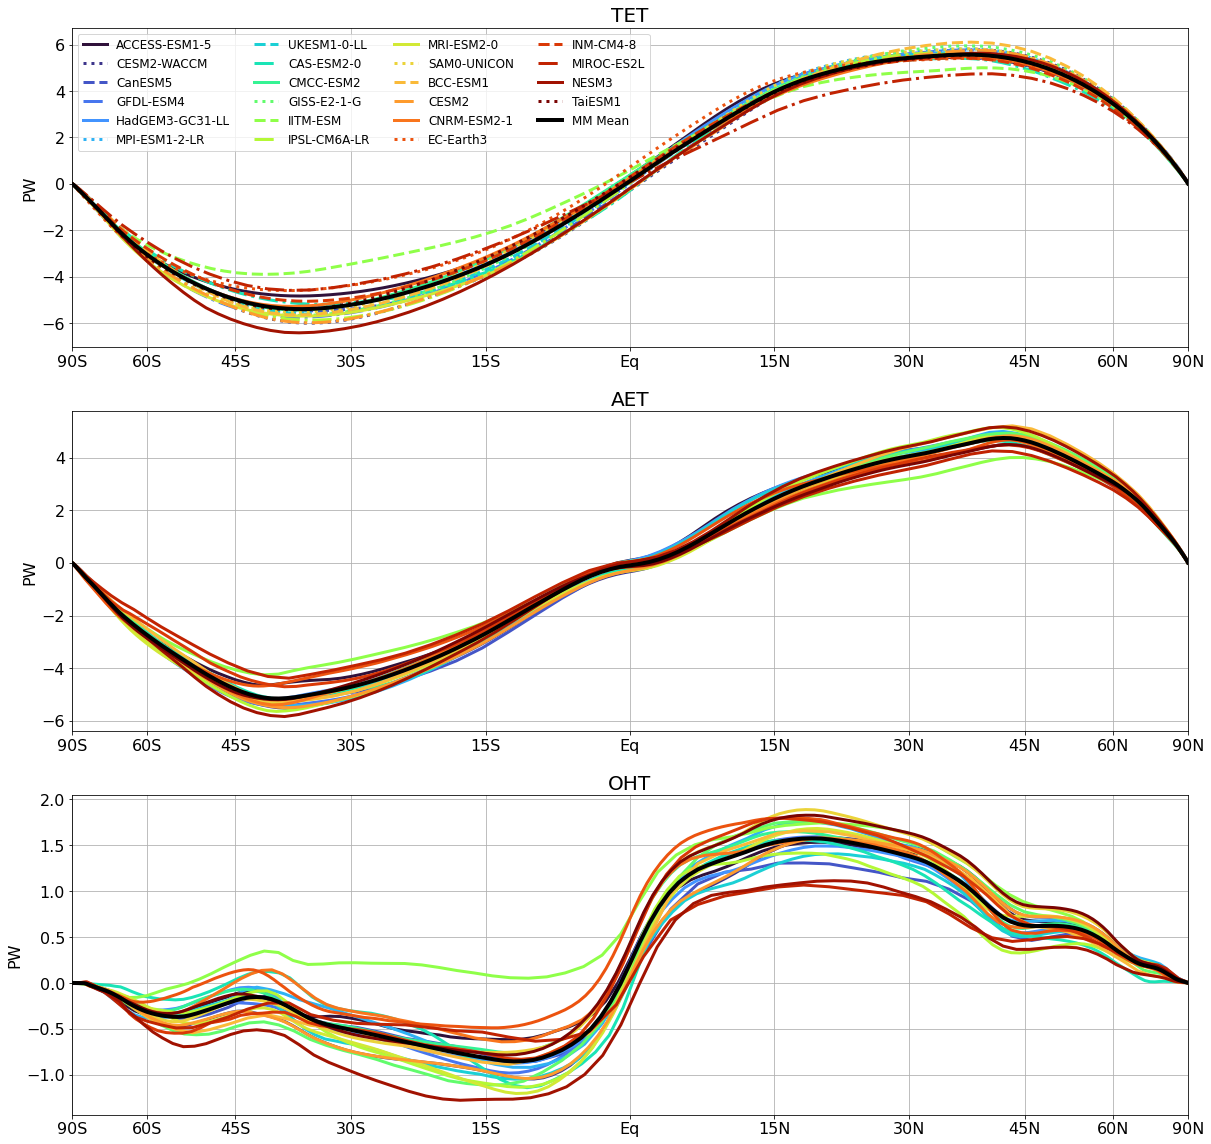

In [172]:
#Check fields!
fig = plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
PlotCMIP_ZL(lat, TET_C, 3, "TET", "PW")
plt.subplot(3,1,2)
PlotCMIP_ZL(lat, AET_C, False, "AET", "PW")
plt.subplot(3,1,3)
PlotCMIP_ZL(lat, OHT_C, False, "OHT", "PW")

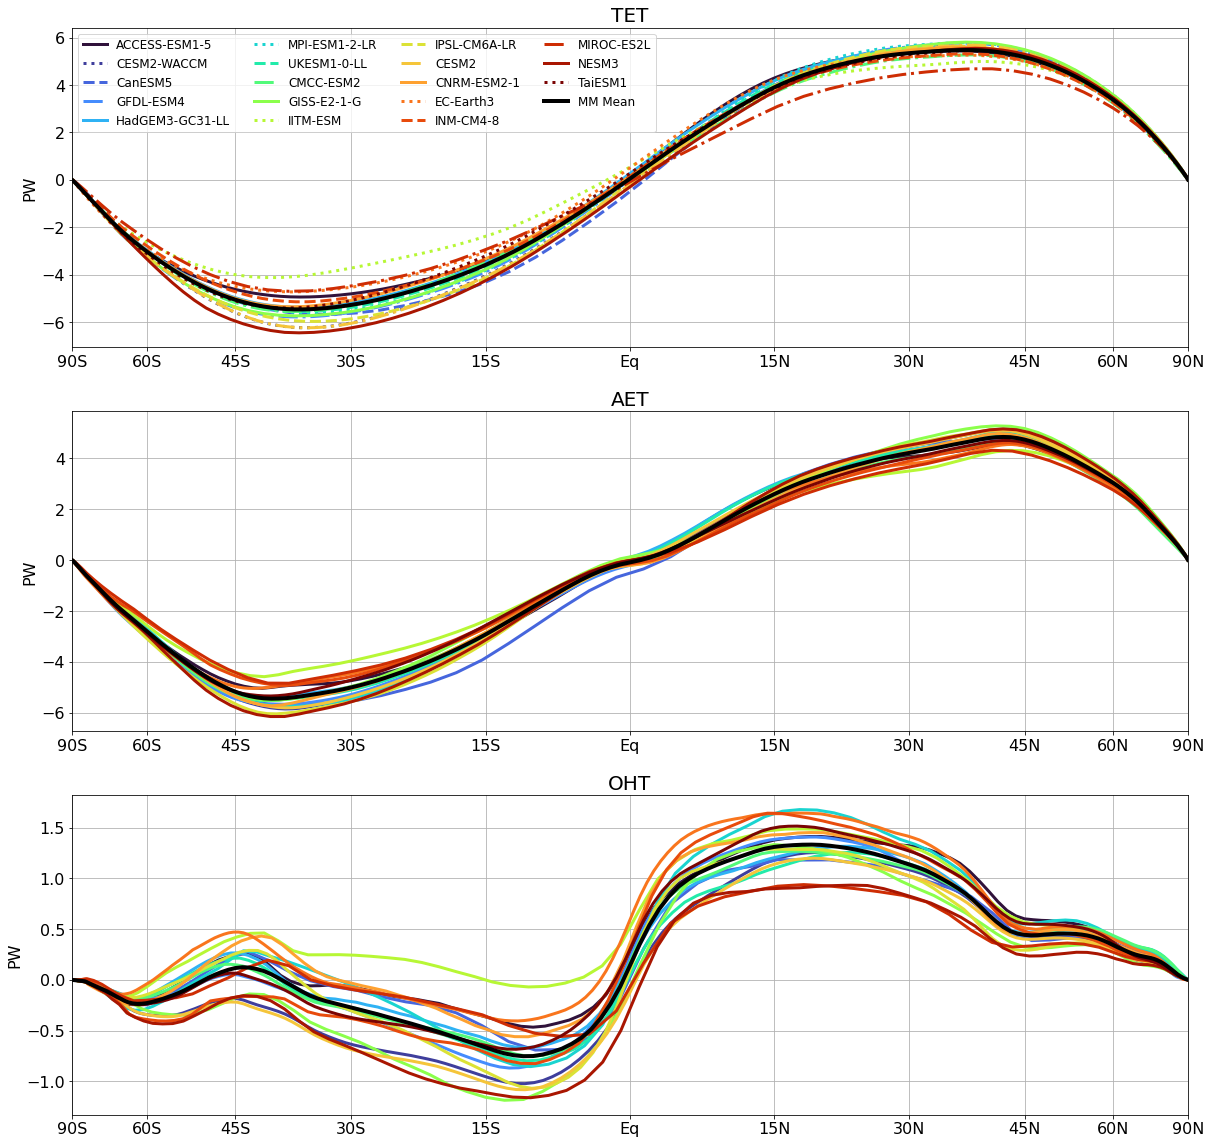

In [173]:
#Check fields!
fig = plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
PlotCMIP_ZL(lat, TET_585, 3, "TET", "PW")
plt.subplot(3,1,2)
PlotCMIP_ZL(lat, AET_585, False, "AET", "PW")
plt.subplot(3,1,3)
PlotCMIP_ZL(lat, OHT_585, False, "OHT", "PW")

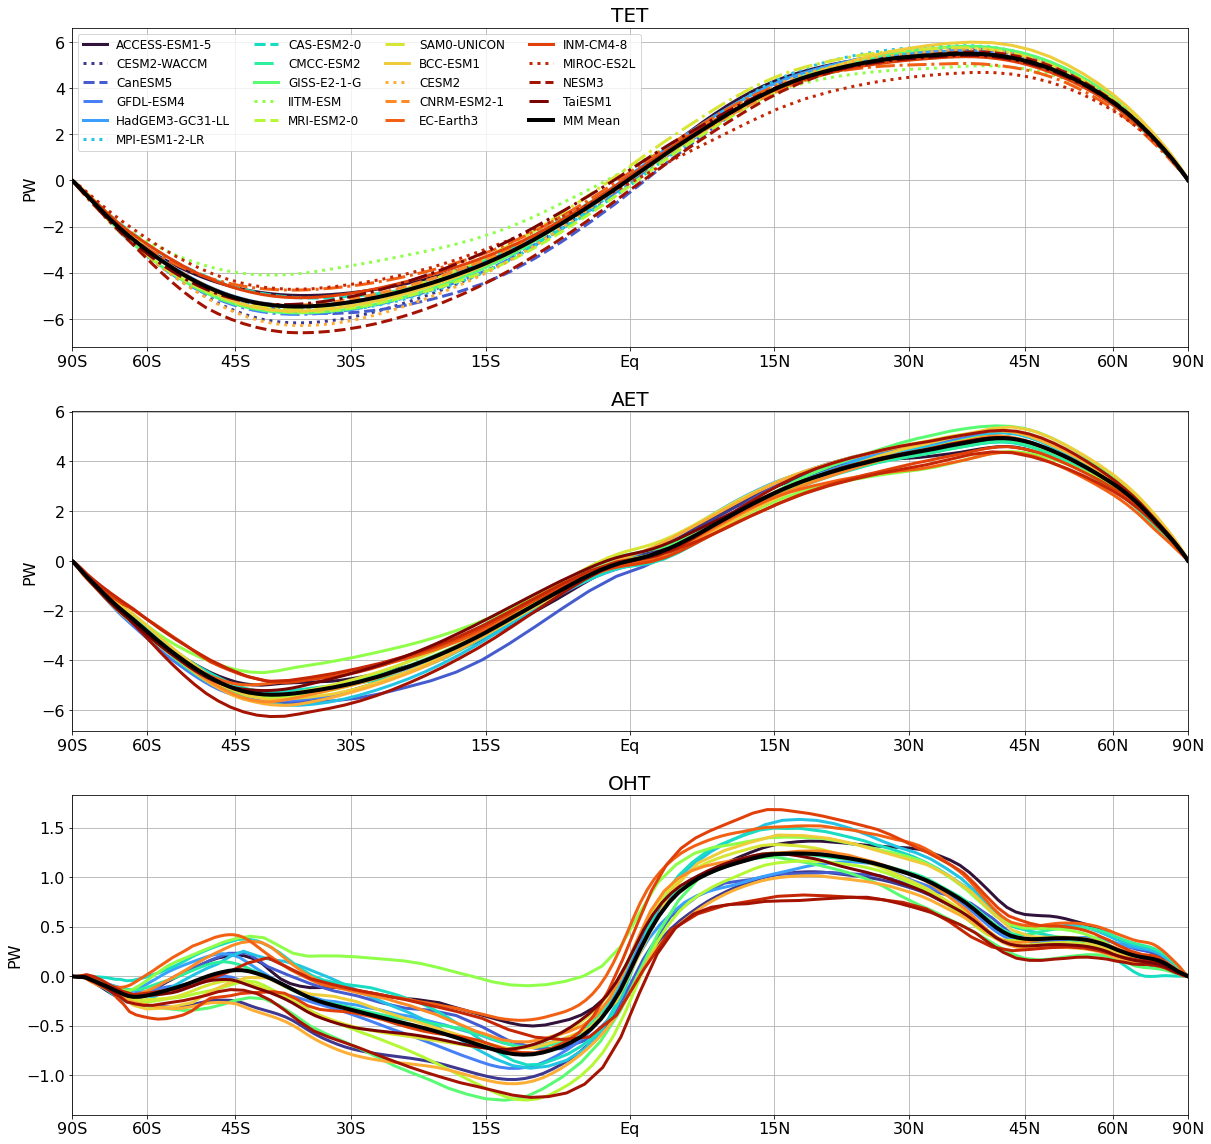

In [174]:
#Check fields!
fig = plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
PlotCMIP_ZL(lat, TET_4X, 3, "TET", "PW")
plt.subplot(3,1,2)
PlotCMIP_ZL(lat, AET_4X, False, "AET", "PW")
plt.subplot(3,1,3)
PlotCMIP_ZL(lat, OHT_4X, False, "OHT", "PW")

In [175]:
dOHT = {}
dAET = {}
dTET = {}
dOHT_4X = {}
dAET_4X = {}
dTET_4X = {}

for i in range(0,nmodel):
    if (mymodels[i] in OHT_C) and (mymodels[i] in OHT_585):
        dOHT[mymodels[i]] = OHT_585[mymodels[i]]-OHT_C[mymodels[i]]
    if (mymodels[i] in AET_C) and (mymodels[i] in AET_585):
        dAET[mymodels[i]] = AET_585[mymodels[i]]-AET_C[mymodels[i]]
    if (mymodels[i] in TET_C) and (mymodels[i] in TET_585):
        dTET[mymodels[i]] = TET_585[mymodels[i]]-TET_C[mymodels[i]]
    if (mymodels[i] in OHT_C) and (mymodels[i] in OHT_4X):
        dOHT_4X[mymodels[i]] = OHT_4X[mymodels[i]]-OHT_C[mymodels[i]]
    if (mymodels[i] in AET_C) and (mymodels[i] in AET_4X):
        dAET_4X[mymodels[i]] = AET_4X[mymodels[i]]-AET_C[mymodels[i]]
    if (mymodels[i] in TET_C) and (mymodels[i] in TET_4X):
        dTET_4X[mymodels[i]] = TET_4X[mymodels[i]]-TET_C[mymodels[i]]

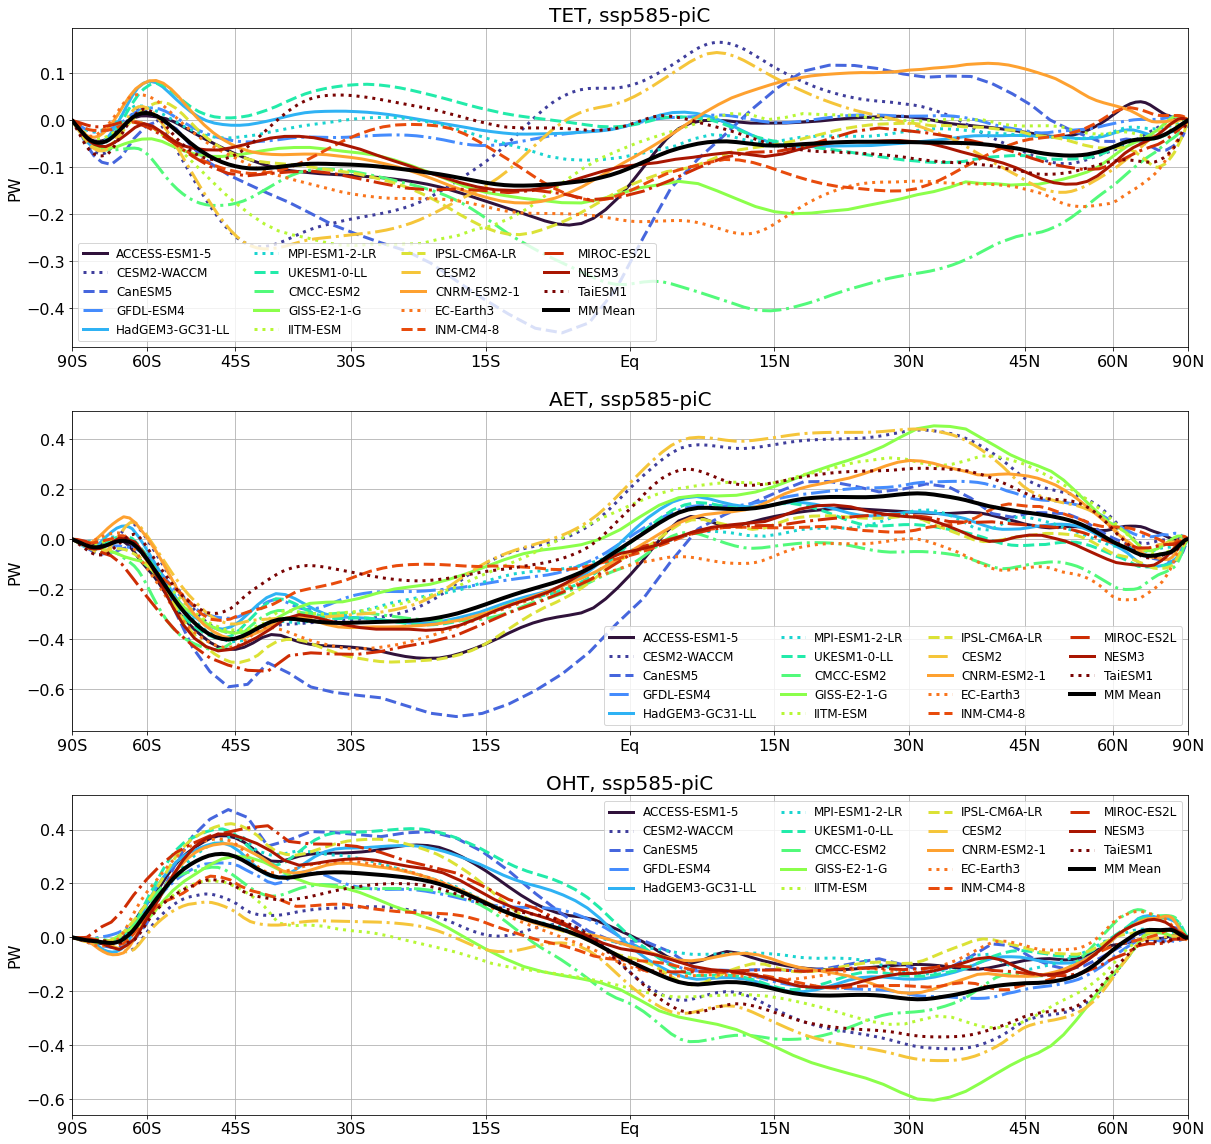

In [176]:
#Check fields!
fig = plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
PlotCMIP_ZL(lat, dTET, 3, "TET, ssp585-piC", "PW")
plt.subplot(3,1,2)
PlotCMIP_ZL(lat, dAET, 3, "AET, ssp585-piC", "PW")
plt.subplot(3,1,3)
PlotCMIP_ZL(lat, dOHT, 3, "OHT, ssp585-piC", "PW")

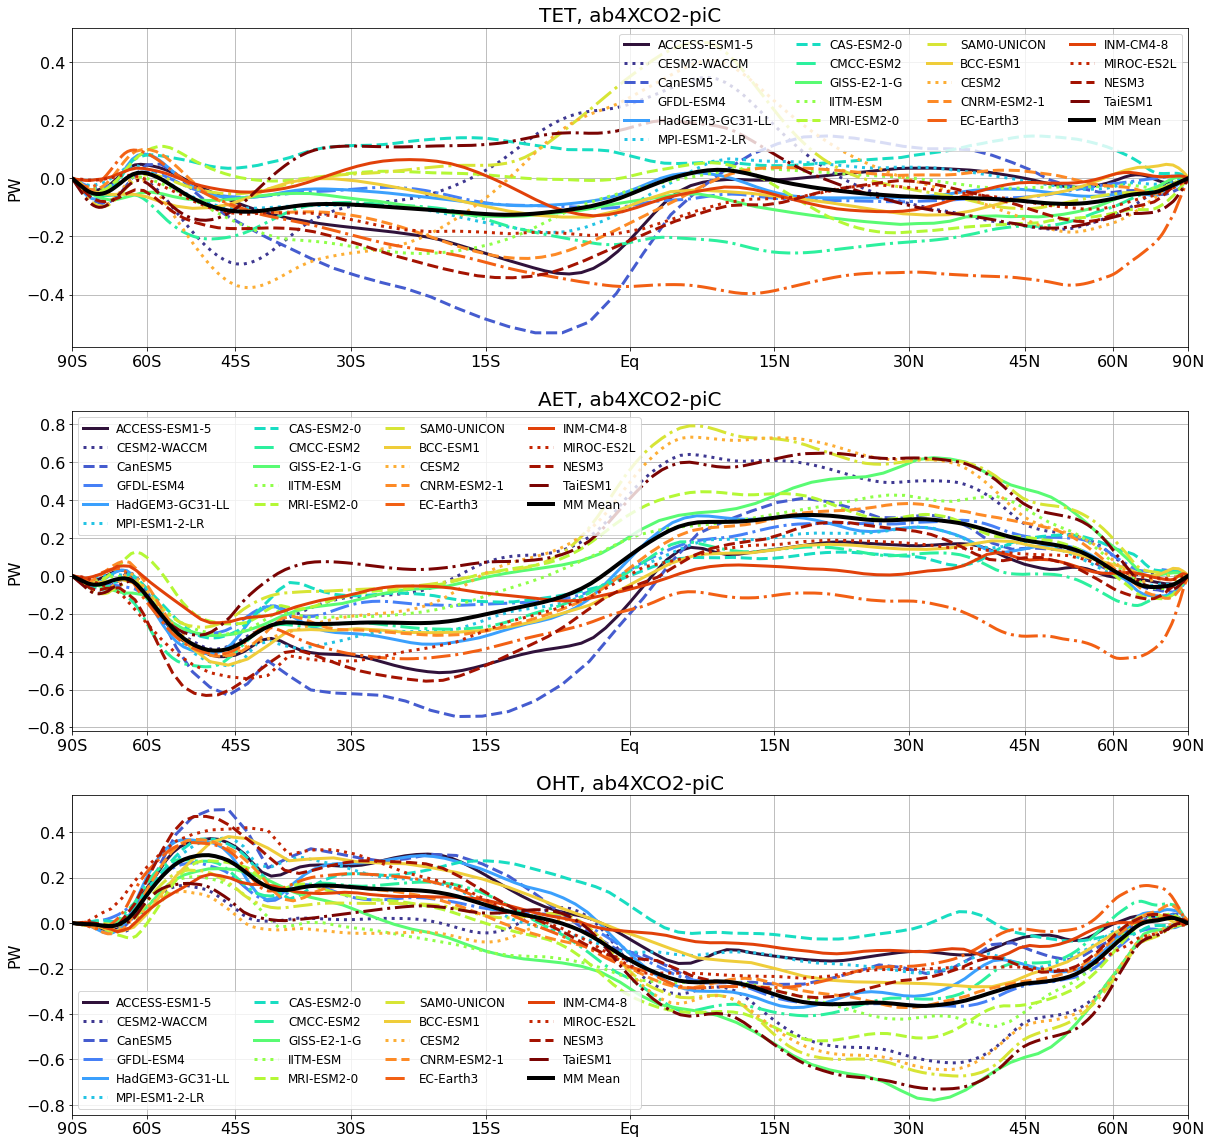

In [177]:
#Check fields!
fig = plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
PlotCMIP_ZL(lat, dTET_4X, 3, "TET, ab4XCO2-piC", "PW")
plt.subplot(3,1,2)
PlotCMIP_ZL(lat, dAET_4X, 3, "AET, ab4XCO2-piC", "PW")
plt.subplot(3,1,3)
PlotCMIP_ZL(lat, dOHT_4X, 3, "OHT, ab4XCO2-piC", "PW")

In [178]:
#Calculate mean and range in OHT - Control and 585 experiments
#Also dOHT!
#This will help make Fig 1 in paper
lat_int = np.linspace(-90., 90., 181)
nkey = len(dOHT)
dOHT_int = np.zeros([nkey, 181])
OHT_C_int = np.zeros([nkey, 181])
OHT_585_int = np.zeros([nkey, 181])
i=0
for key in dOHT:
    lat_mod = lat[key]
    dOHT_mod = dOHT[key]
    dOHT_int[i,:] = np.interp(lat_int, lat_mod, dOHT_mod)
    OHT_C_mod = OHT_C[key]
    OHT_C_int[i,:] = np.interp(lat_int, lat_mod, OHT_C_mod)
    OHT_585_mod = OHT_585[key]
    OHT_585_int[i,:] = np.interp(lat_int, lat_mod, OHT_585_mod)
    i=i+1
    
nkey = len(dOHT_4X)
dOHT_4X_int = np.zeros([nkey, 181])
OHT_C_4X_int = np.zeros([nkey, 181])
OHT_4X_int = np.zeros([nkey, 181])
i=0
for key in dOHT_4X:
    lat_mod = lat[key]
    dOHT_mod = dOHT_4X[key]
    dOHT_4X_int[i,:] = np.interp(lat_int, lat_mod, dOHT_mod)
    OHT_C_mod = OHT_C[key]
    OHT_C_4X_int[i,:] = np.interp(lat_int, lat_mod, OHT_C_mod)
    OHT_4X_mod = OHT_4X[key]
    OHT_4X_int[i,:] = np.interp(lat_int, lat_mod, OHT_4X_mod)
    i=i+1

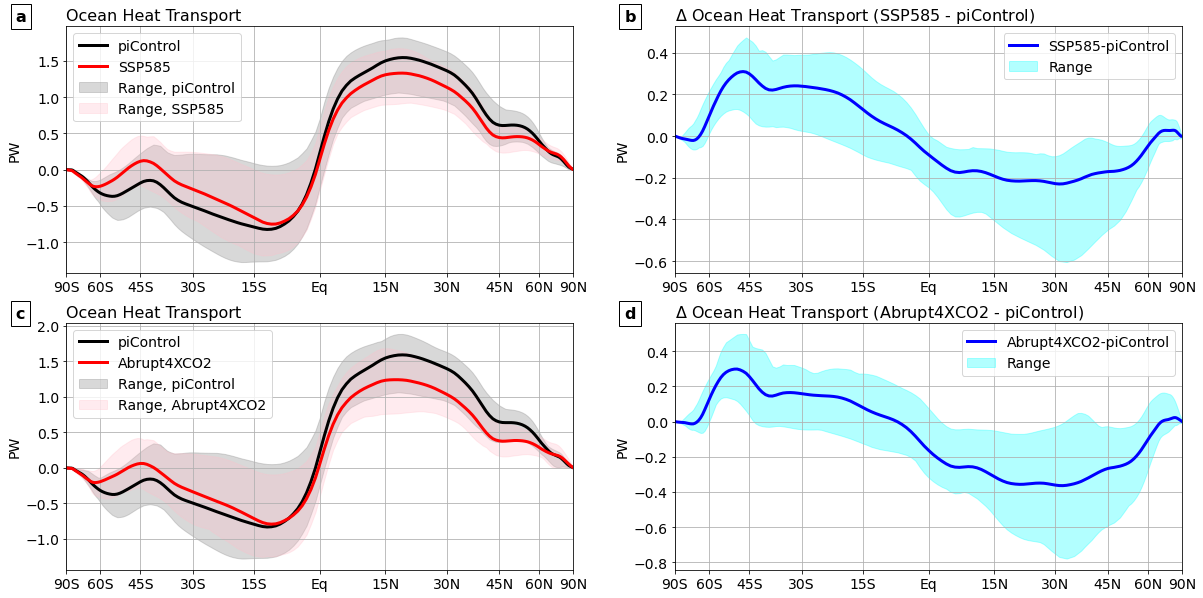

In [179]:
fig = plt.figure(figsize=(20,10))

latlocs0 = np.array([-90., -60., -45., -30., -15., 0., 15., 30., 45., 60., 90.])
latlocs = np.sin(deg2rad*latlocs0)
latlabels = ["90S", "60S", "45S", "30S", "15S", "Eq", "15N", "30N", "45N", "60N", "90N"]

ax = fig.add_subplot(2,2,1)
plt.text(-0.1, 1.02, "a", transform=ax.transAxes, fontsize=16, weight="bold", bbox=dict(facecolor='none', edgecolor='black', pad=5.0))
plt.plot(np.sin(deg2rad*lat_int), np.mean(OHT_C_int,axis=0), label="piControl", linewidth=3., linestyle="solid", color="black")
plt.fill_between(np.sin(deg2rad*lat_int), np.min(OHT_C_int, axis=0), np.max(OHT_C_int, axis=0), color="grey", alpha=0.3, \
                 label="Range, piControl")
plt.plot(np.sin(deg2rad*lat_int), np.mean(OHT_585_int,axis=0), label="SSP585", linewidth=3., linestyle="solid", color="red")
plt.fill_between(np.sin(deg2rad*lat_int), np.min(OHT_585_int, axis=0), np.max(OHT_585_int, axis=0), color="pink", alpha=0.3, \
                 label = "Range, SSP585")
plt.grid(b=True, which='both')
plt.yticks(fontsize=14)
plt.xticks(latlocs, latlabels, fontsize=14)
plt.ylabel("PW", fontsize=14)
plt.legend(fontsize=14, ncol=1)    
plt.title("Ocean Heat Transport", fontsize=16, loc="left")
plt.xlim([-1., 1.])

ax = fig.add_subplot(2,2,2)
plt.text(-0.1, 1.02, "b", transform=ax.transAxes, fontsize=16, weight="bold", bbox=dict(facecolor='none', edgecolor='black', pad=5.0))
plt.plot(np.sin(deg2rad*lat_int), np.mean(dOHT_int,axis=0), linewidth=3., linestyle="solid", color="blue", label="SSP585-piControl")
plt.fill_between(np.sin(deg2rad*lat_int), np.min(dOHT_int, axis=0), np.max(dOHT_int, axis=0), color="cyan", alpha=0.3, label="Range")
plt.grid(b=True, which='both')
plt.yticks(fontsize=14)
plt.xticks(latlocs, latlabels, fontsize=14)
plt.ylabel("PW", fontsize=14)
plt.legend(fontsize=14, ncol=1)    
plt.title("$\Delta$ Ocean Heat Transport (SSP585 - piControl)", fontsize=16, loc="left")
plt.xlim([-1., 1.])

ax = fig.add_subplot(2,2,3)
plt.text(-0.1, 1.02, "c", transform=ax.transAxes, fontsize=16, weight="bold", bbox=dict(facecolor='none', edgecolor='black', pad=5.0))
plt.plot(np.sin(deg2rad*lat_int), np.mean(OHT_C_4X_int,axis=0), label="piControl", linewidth=3., linestyle="solid", color="black")
plt.fill_between(np.sin(deg2rad*lat_int), np.min(OHT_C_4X_int, axis=0), np.max(OHT_C_4X_int, axis=0), color="grey", alpha=0.3, \
                 label="Range, piControl")
plt.plot(np.sin(deg2rad*lat_int), np.mean(OHT_4X_int,axis=0), label="Abrupt4XCO2", linewidth=3., linestyle="solid", color="red")
plt.fill_between(np.sin(deg2rad*lat_int), np.min(OHT_4X_int, axis=0), np.max(OHT_4X_int, axis=0), color="pink", alpha=0.3, \
                 label = "Range, Abrupt4XCO2")
plt.grid(b=True, which='both')
plt.yticks(fontsize=14)
plt.xticks(latlocs, latlabels, fontsize=14)
plt.ylabel("PW", fontsize=14)
plt.legend(fontsize=14, ncol=1)    
plt.title("Ocean Heat Transport", fontsize=16, loc="left")
plt.xlim([-1., 1.])

ax = fig.add_subplot(2,2,4)
plt.text(-0.1, 1.02, "d", transform=ax.transAxes, fontsize=16, weight="bold", bbox=dict(facecolor='none', edgecolor='black', pad=5.0))
plt.plot(np.sin(deg2rad*lat_int), np.mean(dOHT_4X_int,axis=0), linewidth=3., linestyle="solid", color="blue", label="Abrupt4XCO2-piControl")
plt.fill_between(np.sin(deg2rad*lat_int), np.min(dOHT_4X_int, axis=0), np.max(dOHT_4X_int, axis=0), color="cyan", alpha=0.3, label="Range")
plt.grid(b=True, which='both')
plt.yticks(fontsize=14)
plt.xticks(latlocs, latlabels, fontsize=14)
plt.ylabel("PW", fontsize=14)
plt.legend(fontsize=14, ncol=1)    
plt.title("$\Delta$ Ocean Heat Transport (Abrupt4XCO2 - piControl)", fontsize=16, loc="left")
plt.xlim([-1., 1.])

figdir = "/net/aeolus/aura/hansingh/"
#plt.savefig(figdir+"OHTClimSens_Fig_CMIP6_dOHT_SSP585_Ab4XCO2_042021.pdf")

In [185]:
#Grab TOA Fluxes
ts_C = {}
ts_585 = {}
ts_4X = {}
#Grab Control
datadir = "/net/aeolus/aura/hansingh/CMIP/piControl/processed/"
for i in range(0,nmodel):
    print("Working on "+mymodels[i])
    if os.path.exists(datadir+mymodels[i]+"_ts_piControl.nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_ts_piControl.nc", decode_times=False)
        ts_C[mymodels[i]]=np.array(myData.ts[0,:,:].mean(axis=1))
#Grab 585
datadir = "/net/aeolus/aura/hansingh/CMIP/ssp585/processed/"
yrstr = "yrs2070-2100"
for i in range(0,nmodel):
    print("Working on "+mymodels[i])
    if os.path.exists(datadir+mymodels[i]+"_ts_ssp585_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_ts_ssp585_"+yrstr+".nc", decode_times=False)
        ts_585[mymodels[i]]=np.array(myData.ts[0,:,:].mean(axis=1))
#Grab 585
datadir = "/net/aeolus/aura/hansingh/CMIP/abrupt4XCO2/processed/"
yrstr = "yrs100-150"
for i in range(0,nmodel):
    print("Working on "+mymodels[i])
    if os.path.exists(datadir+mymodels[i]+"_ts_abrupt4XCO2_"+yrstr+".nc"):
        myData = xr.open_dataset(datadir+mymodels[i]+"_ts_abrupt4XCO2_"+yrstr+".nc", decode_times=False)
        ts_4X[mymodels[i]]=np.array(myData.ts[0,:,:].mean(axis=1))

dts_585 = {}
dts_4X = {}
for i in range(0,nmodel):
    if (mymodels[i] in ts_C) and (mymodels[i] in ts_585):
        dts_585[mymodels[i]] = ts_585[mymodels[i]]-ts_C[mymodels[i]]
    if (mymodels[i] in ts_C) and (mymodels[i] in ts_4X):
        dts_4X[mymodels[i]] = ts_4X[mymodels[i]]-ts_C[mymodels[i]]

Working on ACCESS-ESM1-5
Working on CESM2-WACCM
Working on CanESM5
Working on GFDL-ESM4
Working on HadGEM3-GC31-LL
Working on INM-CM5-0
Working on MPI-ESM1-2-LR
Working on UKESM1-0-LL
Working on AWI-ESM-1-1-LR
Working on CAS-ESM2-0
Working on CMCC-ESM2
Working on E3SM-1-1
Working on GISS-E2-1-G
Working on IITM-ESM
Working on IPSL-CM6A-LR
Working on MRI-ESM2-0
Working on SAM0-UNICON
Working on BCC-ESM1
Working on CESM2
Working on CNRM-ESM2-1
Working on EC-Earth3
Working on GISS-E2-2-G
Working on INM-CM4-8
Working on MIROC-ES2L
Working on NESM3
Working on TaiESM1
Working on ACCESS-ESM1-5
Working on CESM2-WACCM
Working on CanESM5
Working on GFDL-ESM4
Working on HadGEM3-GC31-LL
Working on INM-CM5-0
Working on MPI-ESM1-2-LR
Working on UKESM1-0-LL
Working on AWI-ESM-1-1-LR
Working on CAS-ESM2-0
Working on CMCC-ESM2
Working on E3SM-1-1
Working on GISS-E2-1-G
Working on IITM-ESM
Working on IPSL-CM6A-LR
Working on MRI-ESM2-0
Working on SAM0-UNICON
Working on BCC-ESM1
Working on CESM2
Working on

In [187]:
print(len(dts_4X["EC-Earth3"]))

256


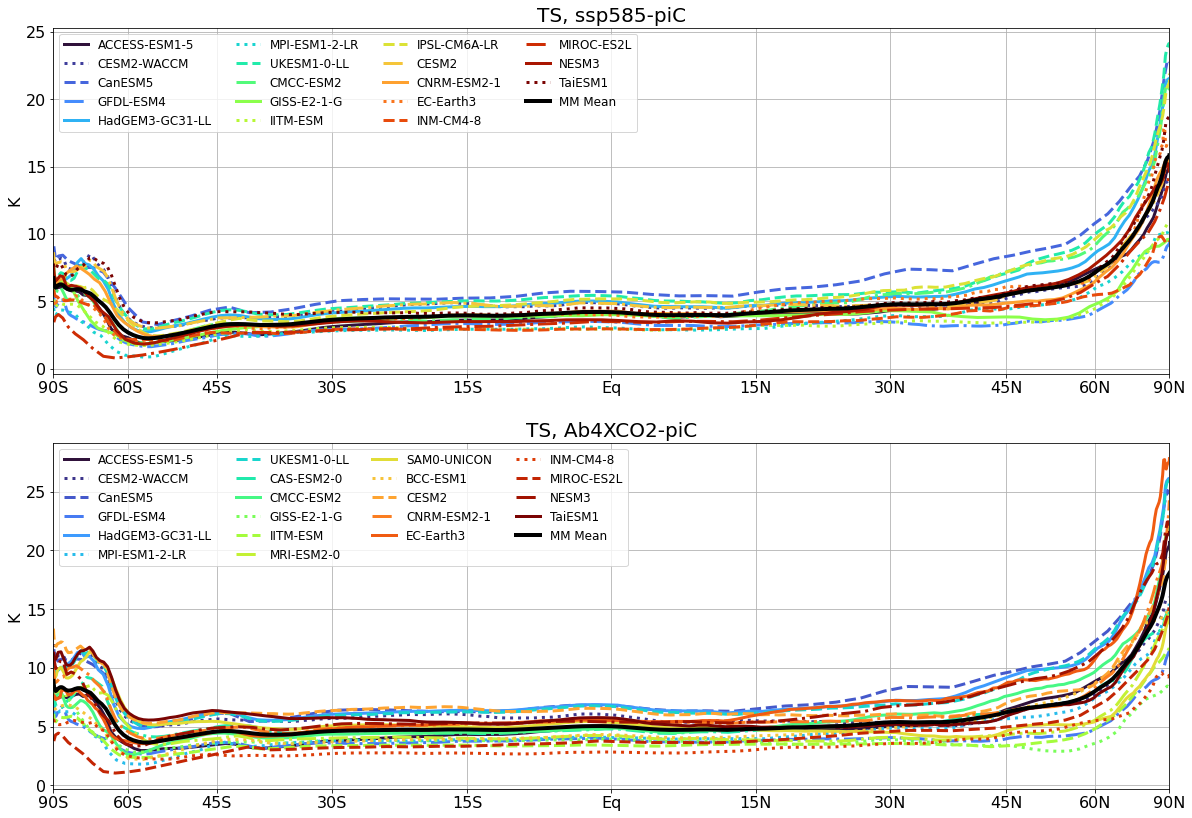

In [188]:
fig = plt.figure(figsize=(20,14))
plt.subplot(2,1,1)
PlotCMIP_ZL(lat, dts_585, 3, "TS, ssp585-piC", "K")
plt.subplot(2,1,2)
PlotCMIP_ZL(lat, dts_4X, 3, "TS, Ab4XCO2-piC", "K")

In [304]:
#Calculate some individual points for making scatterplots
latspec = 45.
dGMST_585 = {}
dGMST_4X = {}
dOHT_585_latspec = {}
dOHT_4X_latspec = {}

for key in dOHT:
    latmod = np.array(lat[key])
    OHTmod = OHT_C[key]
    dOHTmod = dOHT[key]
    ind_latspec = np.abs(latspec-latmod).argmin()
    dOHT_585_latspec[key] = dOHTmod[ind_latspec]
    
for key in dOHT_4X:
    latmod = np.array(lat[key])
    OHTmod = OHT_C[key]
    dOHTmod = dOHT_4X[key]
    ind_latspec = np.abs(latspec-latmod).argmin()
    dOHT_4X_latspec[key] = dOHTmod[ind_latspec]

#for key in dAET:
#    latmod = np.array(lat[key])
#    dAETmod = dAET[key]
#    ind_latspec = np.abs(latspec-latmod).argmin()
#    dOHT_latspec[key] = dAETmod[ind_latspec]

for key in dts_585:
    latmod = np.array(lat[key])
    dtsmod = np.array(dts_585[key])
    coslat = np.cos(latmod*deg2rad)
    myinds = np.where(latmod>0.)
    dGMST_585[key] = np.sum(coslat[myinds]*dtsmod[myinds])/np.sum(coslat[myinds])

for key in dts_4X:
    latmod = np.array(lat[key])
    dtsmod = np.array(dts_4X[key])
    coslat = np.cos(latmod*deg2rad)
    myinds = np.where(latmod>0.)
    dGMST_4X[key] = np.sum(coslat[myinds]*dtsmod[myinds])/np.sum(coslat[myinds])

0.5044623449003419


Text(0.0, 1.0, 'SSP585, r = 0.5')

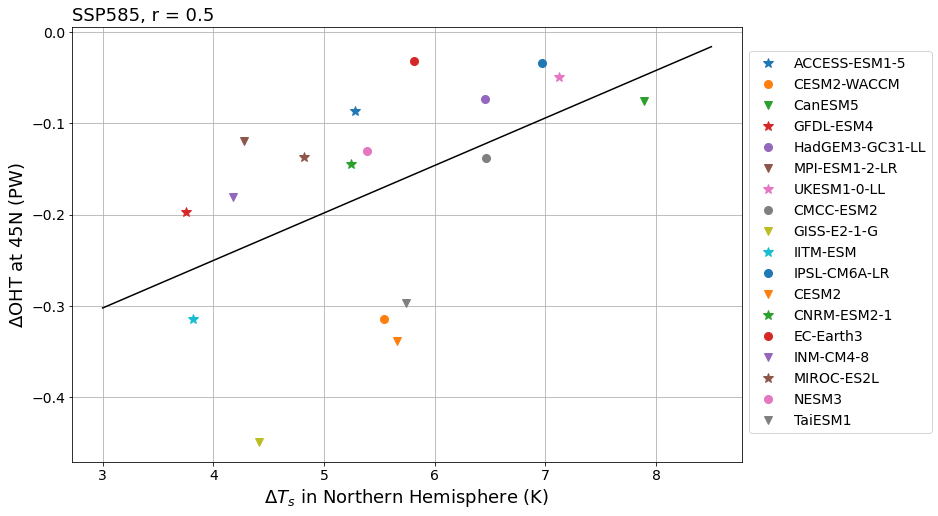

In [305]:
fig = plt.figure(figsize=(12,8))
i = 0
for key in dGMST:
    if np.mod(i,3)==1:
        plt.plot(dGMST_585[key], dOHT_585_latspec[key], 'o', label=str(key), markersize=8.)
    if np.mod(i,3)==2:
        plt.plot(dGMST_585[key], dOHT_585_latspec[key], 'v', label=str(key), markersize=8.)
    if np.mod(i,3)==0:
        plt.plot(dGMST_585[key], dOHT_585_latspec[key], '*', label=str(key), markersize=10.)
    i = i+1
plt.legend(fontsize=14, ncol=1, bbox_to_anchor=(1,0.05), loc="lower left")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$\Delta T_s$ in Northern Hemisphere (K)", fontsize=18)
plt.ylabel("$\Delta$OHT at 45N (PW)", fontsize=18)
plt.grid(b=True, which='both')

val_dGMST = np.zeros(len(dGMST_585))
val_dOHT = np.zeros(len(dOHT_585_latspec))
i=0
for key in dGMST:
    val_dGMST[i] = dGMST_585[key]
    val_dOHT[i] = dOHT_585_latspec[key]
    i=i+1
    
slope, intercept, r_value, p_value, std_err = stats.linregress(val_dGMST, val_dOHT)

TempVec = np.linspace(3., 8.5, 20)
OHTVec = slope*TempVec+intercept
plt.plot(TempVec, OHTVec, "k-")
print(r_value)

plt.title("SSP585, r = "+str(np.round(r_value,2)), loc="left", fontsize=18)

#plt.savefig("/net/aeolus/aura/hansingh/SOM_OHT_Fig_CMIP6_dOHTdOHTvsdT_042021.pdf")

0.3975375685567492


Text(0.0, 1.0, 'Abrupt4XCO2, r = 0.4')

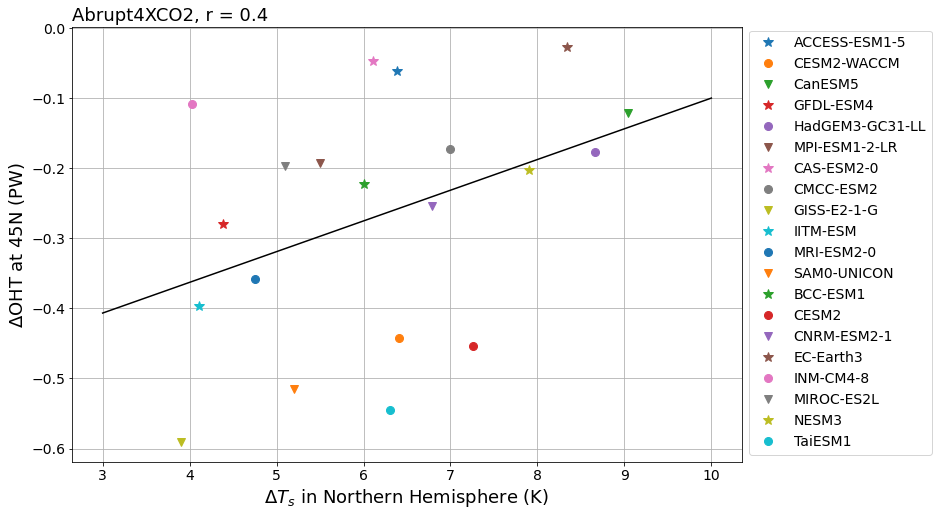

In [306]:
fig = plt.figure(figsize=(12,8))
i = 0
for key in dOHT_4X_latspec:
    if np.mod(i,3)==1:
        plt.plot(dGMST_4X[key], dOHT_4X_latspec[key], 'o', label=str(key), markersize=8.)
    if np.mod(i,3)==2:
        plt.plot(dGMST_4X[key], dOHT_4X_latspec[key], 'v', label=str(key), markersize=8.)
    if np.mod(i,3)==0:
        plt.plot(dGMST_4X[key], dOHT_4X_latspec[key], '*', label=str(key), markersize=10.)
    i = i+1
plt.legend(fontsize=14, ncol=1, bbox_to_anchor=(1.,0.), loc="lower left")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$\Delta T_s$ in Northern Hemisphere (K)", fontsize=18)
plt.ylabel("$\Delta$OHT at 45N (PW)", fontsize=18)
plt.grid(b=True, which='both')

val_dGMST = np.zeros(len(dOHT_4X_latspec))
val_dOHT = np.zeros(len(dOHT_4X_latspec))
i=0
for key in dOHT_4X_latspec:
    val_dGMST[i] = dGMST_4X[key]
    val_dOHT[i] = dOHT_4X_latspec[key]
    i=i+1
    
slope, intercept, r_value, p_value, std_err = stats.linregress(val_dGMST, val_dOHT)

TempVec = np.linspace(3., 10., 20)
OHTVec = slope*TempVec+intercept
plt.plot(TempVec, OHTVec, "k-")
print(r_value)

plt.title("Abrupt4XCO2, r = "+str(np.round(r_value,2)), loc="left", fontsize=18)

In [307]:
dOHT_4X_keysort = sorted(dOHT_4X_latspec, key=dOHT_4X_latspec.get)
dOHT_585_keysort = sorted(dOHT_585_latspec, key=dOHT_585_latspec.get)
print(dOHT_4X_keysort)
print(dOHT_585_keysort)

['GISS-E2-1-G', 'TaiESM1', 'SAM0-UNICON', 'CESM2', 'CESM2-WACCM', 'IITM-ESM', 'MRI-ESM2-0', 'GFDL-ESM4', 'CNRM-ESM2-1', 'BCC-ESM1', 'NESM3', 'MIROC-ES2L', 'MPI-ESM1-2-LR', 'HadGEM3-GC31-LL', 'CMCC-ESM2', 'CanESM5', 'INM-CM4-8', 'ACCESS-ESM1-5', 'CAS-ESM2-0', 'EC-Earth3']
['GISS-E2-1-G', 'CESM2', 'IITM-ESM', 'CESM2-WACCM', 'TaiESM1', 'GFDL-ESM4', 'INM-CM4-8', 'CNRM-ESM2-1', 'CMCC-ESM2', 'MIROC-ES2L', 'NESM3', 'MPI-ESM1-2-LR', 'ACCESS-ESM1-5', 'CanESM5', 'HadGEM3-GC31-LL', 'UKESM1-0-LL', 'IPSL-CM6A-LR', 'EC-Earth3']


In [312]:
print(dGMST_4X)
print(dGMST_585)

{'ACCESS-ESM1-5': 6.3817884154149676, 'CESM2-WACCM': 6.413301420613724, 'CanESM5': 9.044459922197307, 'GFDL-ESM4': 4.383353133513312, 'HadGEM3-GC31-LL': 8.666604513250695, 'MPI-ESM1-2-LR': 5.503071641696541, 'UKESM1-0-LL': 8.463144858789553, 'CAS-ESM2-0': 6.1104144048329525, 'CMCC-ESM2': 6.999118660268515, 'GISS-E2-1-G': 3.9007751997598037, 'IITM-ESM': 4.107494696523537, 'MRI-ESM2-0': 4.757217266356748, 'SAM0-UNICON': 5.198037652564275, 'BCC-ESM1': 6.007374263570917, 'CESM2': 7.26155684461417, 'CNRM-ESM2-1': 6.782013510646285, 'EC-Earth3': 8.338088324269389, 'INM-CM4-8': 4.023322357767277, 'MIROC-ES2L': 5.099023030974137, 'NESM3': 7.905161496905115, 'TaiESM1': 6.309984371612942}
{'ACCESS-ESM1-5': 5.277215610687373, 'CESM2-WACCM': 5.537698081053737, 'CanESM5': 7.8923178412997945, 'GFDL-ESM4': 3.7510870865936004, 'HadGEM3-GC31-LL': 6.451357801335947, 'MPI-ESM1-2-LR': 4.280112545403098, 'UKESM1-0-LL': 7.120582481956901, 'CMCC-ESM2': 6.46208845030185, 'GISS-E2-1-G': 4.415115212732096, 'IIT

In [348]:
def PlotCMIP_ZL_sort(SortedKeys, LatDict, FieldDict, wantLabel, myTitle, myYlabel, **kwargs):
    Ymin = kwargs.get("Ymin", None)
    Ymax = kwargs.get("Ymax", None)
    latlocs0 = np.array([-90., -60., -45., -30., -15., 0., 15., 30., 45., 60., 90.])
    latlocs = np.sin(deg2rad*latlocs0)
    latlabels = ["90S", "60S", "45S", "30S", "15S", "Eq", "15N", "30N", "45N", "60N", "90N"]
    nfield = len(FieldDict)
    cmap = matplotlib.cm.get_cmap("coolwarm")
    newcolors = cmap(np.linspace(0,1.,nfield))
    newcmp = matplotlib.colors.ListedColormap(newcolors)
    i=0
    nkey = len(FieldDict)
    if wantLabel:
        for key in SortedKeys:
            plt.plot(np.sin(deg2rad*LatDict[key]), FieldDict[key], color=newcmp((i/nfield)+0.01), label=str(key), linewidth=2, linestyle="solid")
            i=i+1
    else:
        for key in SortedKeys:
            plt.plot(np.sin(deg2rad*LatDict[key]), FieldDict[key], color=newcmp((i/nfield)+0.01), label=str(key), linewidth=2)
            i=i+1
    #Calculate zonal mean and include it in the figure:
    lat_int = np.linspace(-90., 90., 181)
    field_int = np.zeros([nkey,181])
    j=0
    for key in FieldDict:
        field_int[j,:] = np.interp(lat_int, LatDict[key], FieldDict[key])
        j=j+1
    field_mean = np.mean(field_int, axis=0)
    plt.plot(np.sin(deg2rad*lat_int), field_mean, color="black", label="MM Mean", linewidth=3., linestyle="dotted")
    plt.grid(b=True, which='both')
    plt.yticks(fontsize=16)
    plt.xticks(latlocs, latlabels, fontsize=16)
    plt.ylabel(myYlabel, fontsize=16)
    if wantLabel==1:
        plt.legend(fontsize=12, ncol=nfield)
    if wantLabel==2:
        plt.legend(fontsize=12, ncol=1)
    if wantLabel==3:
        plt.legend(fontsize=12, ncol=3)    
    plt.title(myTitle, fontsize=16, loc="left")
    plt.xlim([-1., 1.])
    if Ymin:
        plt.ylim([Ymin, Ymax])
        
def CoolScatter(Xdict, Ydict, SortDict, Xlabel, Ylabel, Title):
    nfield = len(SortDict)
    cmap = matplotlib.cm.get_cmap("coolwarm")
    newcolors = cmap(np.linspace(0,1.,nfield))
    newcmp = matplotlib.colors.ListedColormap(newcolors)
    i = 0
    for key in SortDict:
        if np.mod(i,3)==1:
            plt.plot(Xdict[key], Ydict[key], 'o', label=str(key), markersize=8., color=newcmp((i/nfield)+0.01))
        if np.mod(i,3)==2:
            plt.plot(Xdict[key], Ydict[key], 'v', label=str(key), markersize=8., color=newcmp((i/nfield)+0.01))
        if np.mod(i,3)==0:
            plt.plot(Xdict[key], Ydict[key], '*', label=str(key), markersize=10., color=newcmp((i/nfield)+0.01))
        i = i+1
    plt.legend(fontsize=10, ncol=1, bbox_to_anchor=(1.15,0.5), loc="center")
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(Xlabel, fontsize=16, labelpad=-3.)
    plt.ylabel(Ylabel, fontsize=16)
    plt.grid(b=True, which='both')
    val_X = np.zeros(len(SortDict))
    val_Y = np.zeros(len(SortDict))
    i=0
    for key in SortDict:
        val_X[i] = Xdict[key]
        val_Y[i] = Ydict[key]
        i=i+1
    slope, intercept, r_value, p_value, std_err = stats.linregress(val_X, val_Y)
    XVec = np.linspace(np.min(val_X), np.max(val_X), 20)
    YVec = slope*XVec+intercept
    plt.plot(XVec, YVec, "k-")
    print(r_value)
    plt.title(Title+", r = "+str(np.round(r_value,2)), loc="left", fontsize=18)

0.5044623449003419
0.39753756855674927


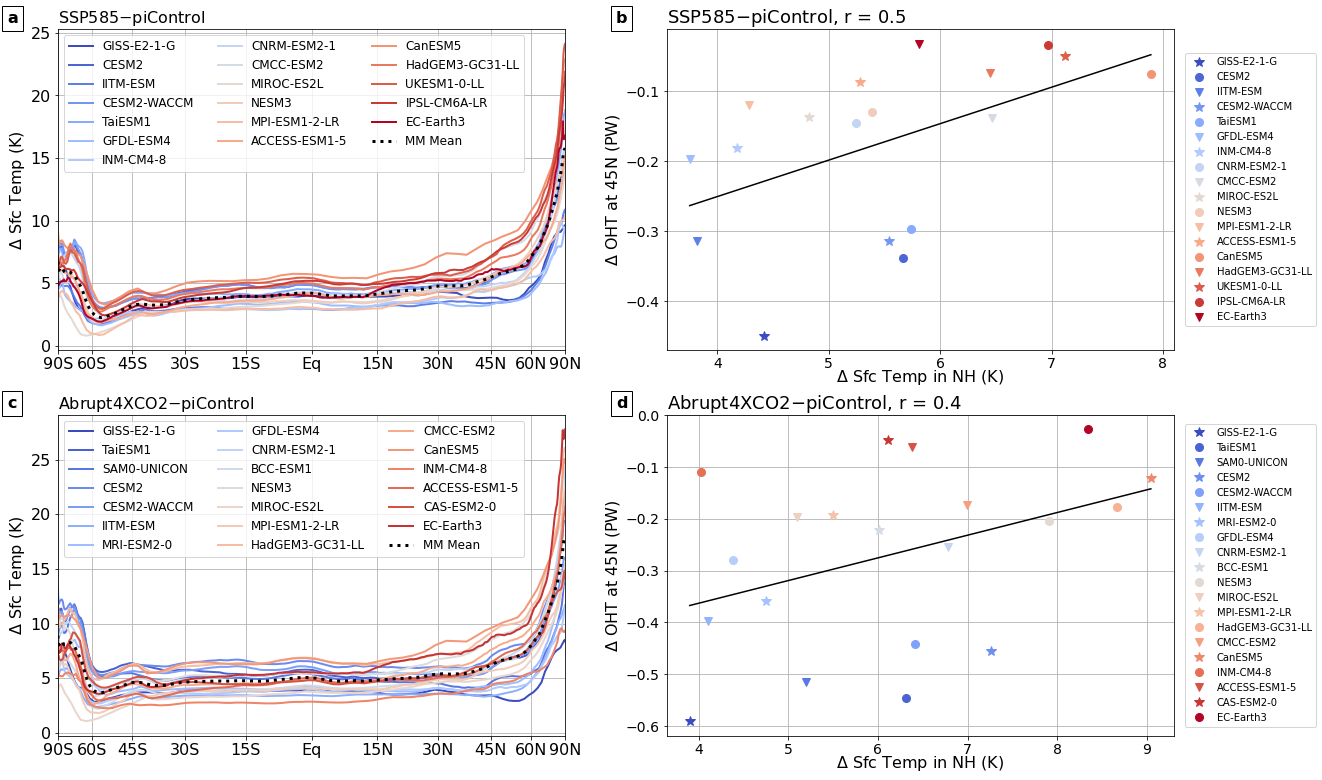

In [356]:
fig = plt.figure(figsize=(20,13))
ax = fig.add_subplot(2,2,1)
plt.text(-0.1, 1.02, "a", transform=ax.transAxes, fontsize=16, weight="bold", bbox=dict(facecolor='none', edgecolor='black', pad=5.0))
PlotCMIP_ZL_sort(dOHT_585_keysort, lat, dts_585, 3, "SSP585$-$piControl", "$\Delta$ Sfc Temp (K)")
ax = fig.add_subplot(2,2,3)
plt.text(-0.1, 1.02, "c", transform=ax.transAxes, fontsize=16, weight="bold", bbox=dict(facecolor='none', edgecolor='black', pad=5.0))
PlotCMIP_ZL_sort(dOHT_4X_keysort, lat, dts_4X, 3, "Abrupt4XCO2$-$piControl", "$\Delta$ Sfc Temp (K)")
ax = fig.add_subplot(2,2,2)
plt.text(-0.1, 1.02, "b", transform=ax.transAxes, fontsize=16, weight="bold", bbox=dict(facecolor='none', edgecolor='black', pad=5.0))
CoolScatter(dGMST_585, dOHT_585_latspec, dOHT_585_keysort, "$\Delta$ Sfc Temp in NH (K)", "$\Delta$ OHT at 45N (PW)", "SSP585$-$piControl")
ax = fig.add_subplot(2,2,4)
plt.text(-0.1, 1.02, "d", transform=ax.transAxes, fontsize=16, weight="bold", bbox=dict(facecolor='none', edgecolor='black', pad=5.0))
CoolScatter(dGMST_4X, dOHT_4X_latspec, dOHT_4X_keysort, "$\Delta$ Sfc Temp in NH (K)", "$\Delta$ OHT at 45N (PW)", "Abrupt4XCO2$-$piControl")

figdir = "/net/aeolus/aura/hansingh/"
plt.savefig(figdir+"OHTClimSens_Fig_CMIP6_dOHT_dTS_scatter_SSP585_Ab4XCO2_042021.pdf")

NameError: name 'lwnet_anom' is not defined

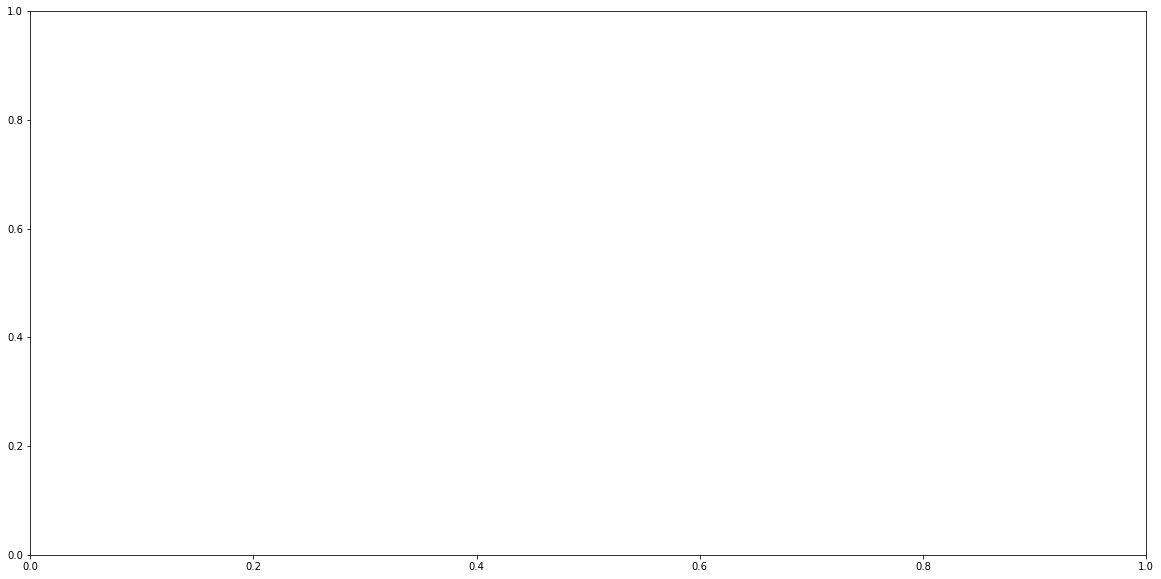

In [353]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
PlotCMIP_ZL(lat, lwnet_anom, 3, "Sfc Net LW Up, ssp585-piC", "W m$^{-2}$")

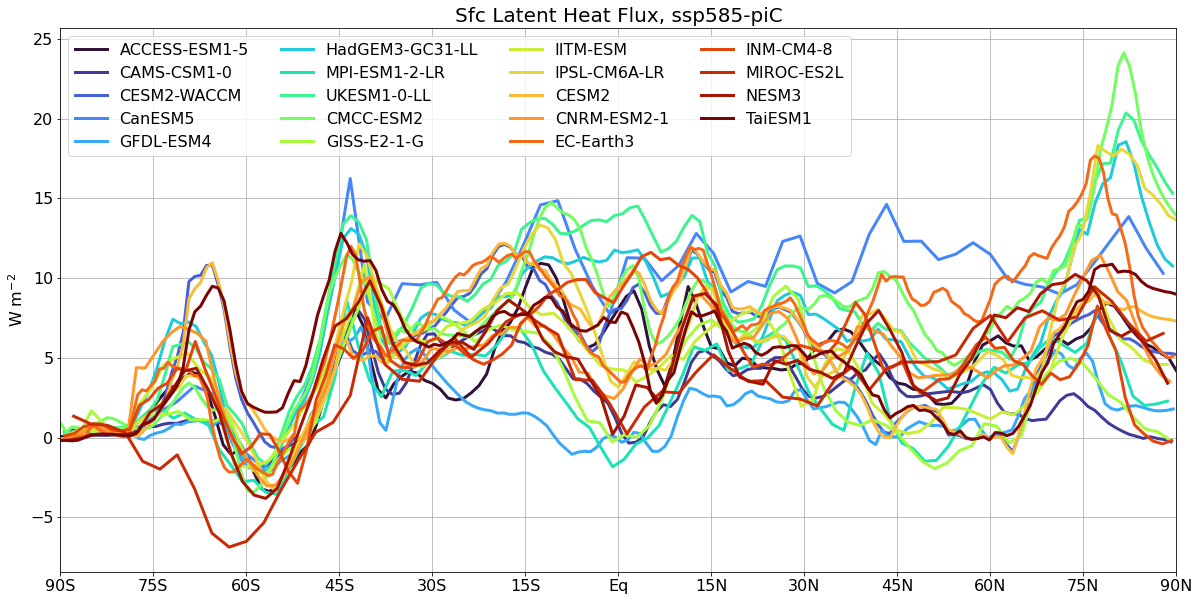

In [18]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
PlotCMIP_ZL(lat, lh_anom, 3, "Sfc Latent Heat Flux, ssp585-piC", "W m$^{-2}$")

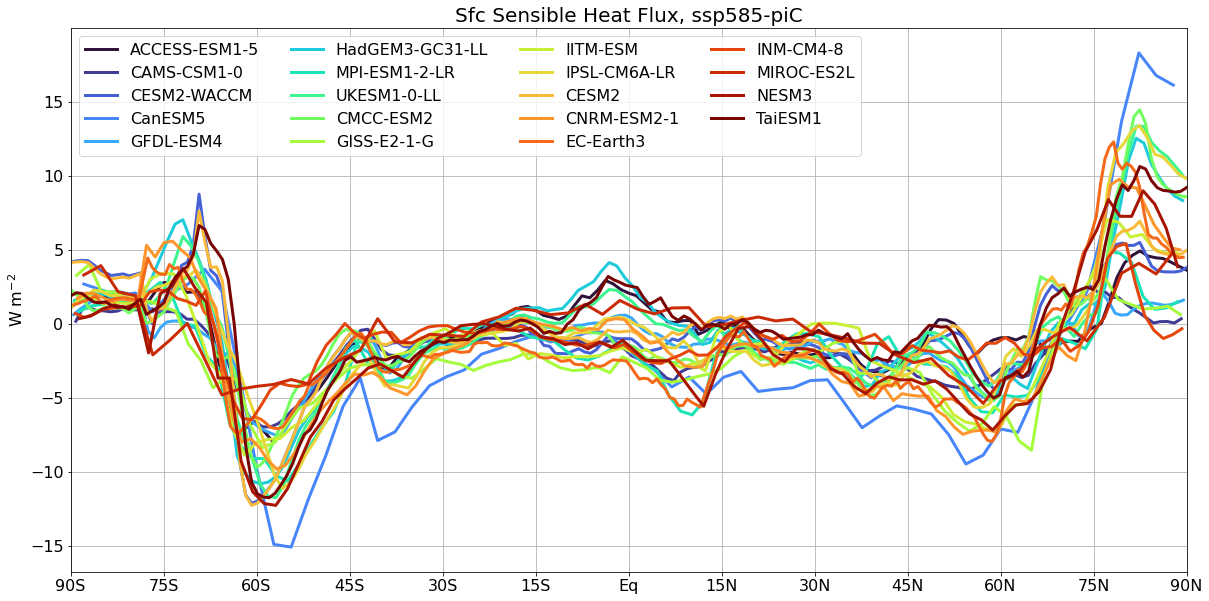

In [19]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
PlotCMIP_ZL(lat, sh_anom, 3, "Sfc Sensible Heat Flux, ssp585-piC", "W m$^{-2}$")

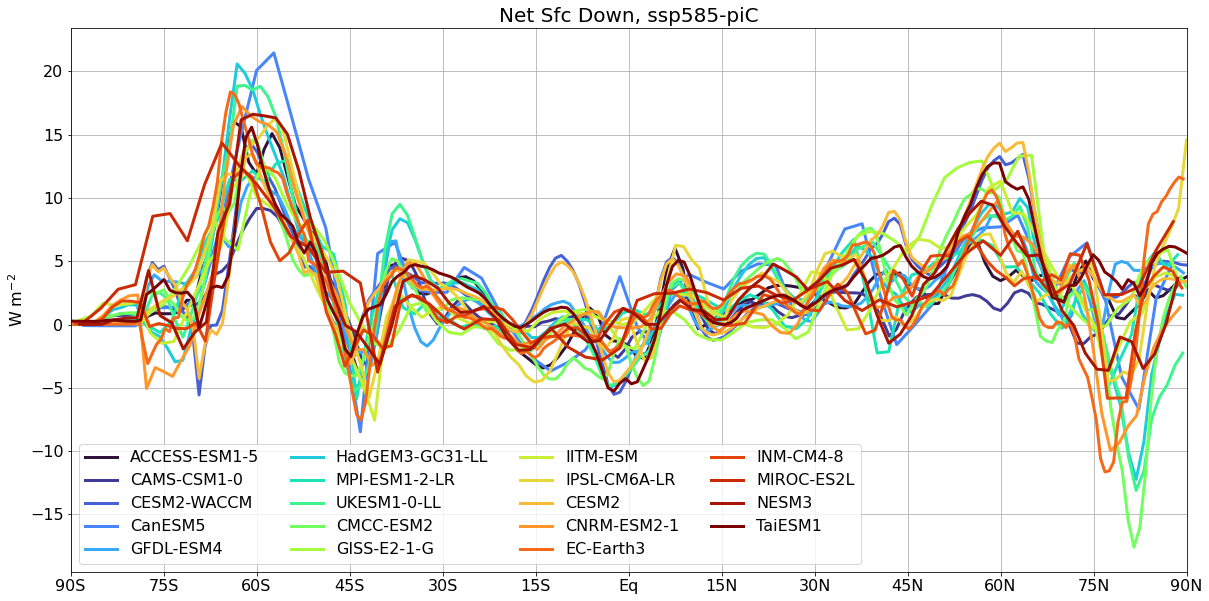

In [20]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
PlotCMIP_ZL(lat, sfcnet_anom, 3, "Net Sfc Down, ssp585-piC", "W m$^{-2}$")

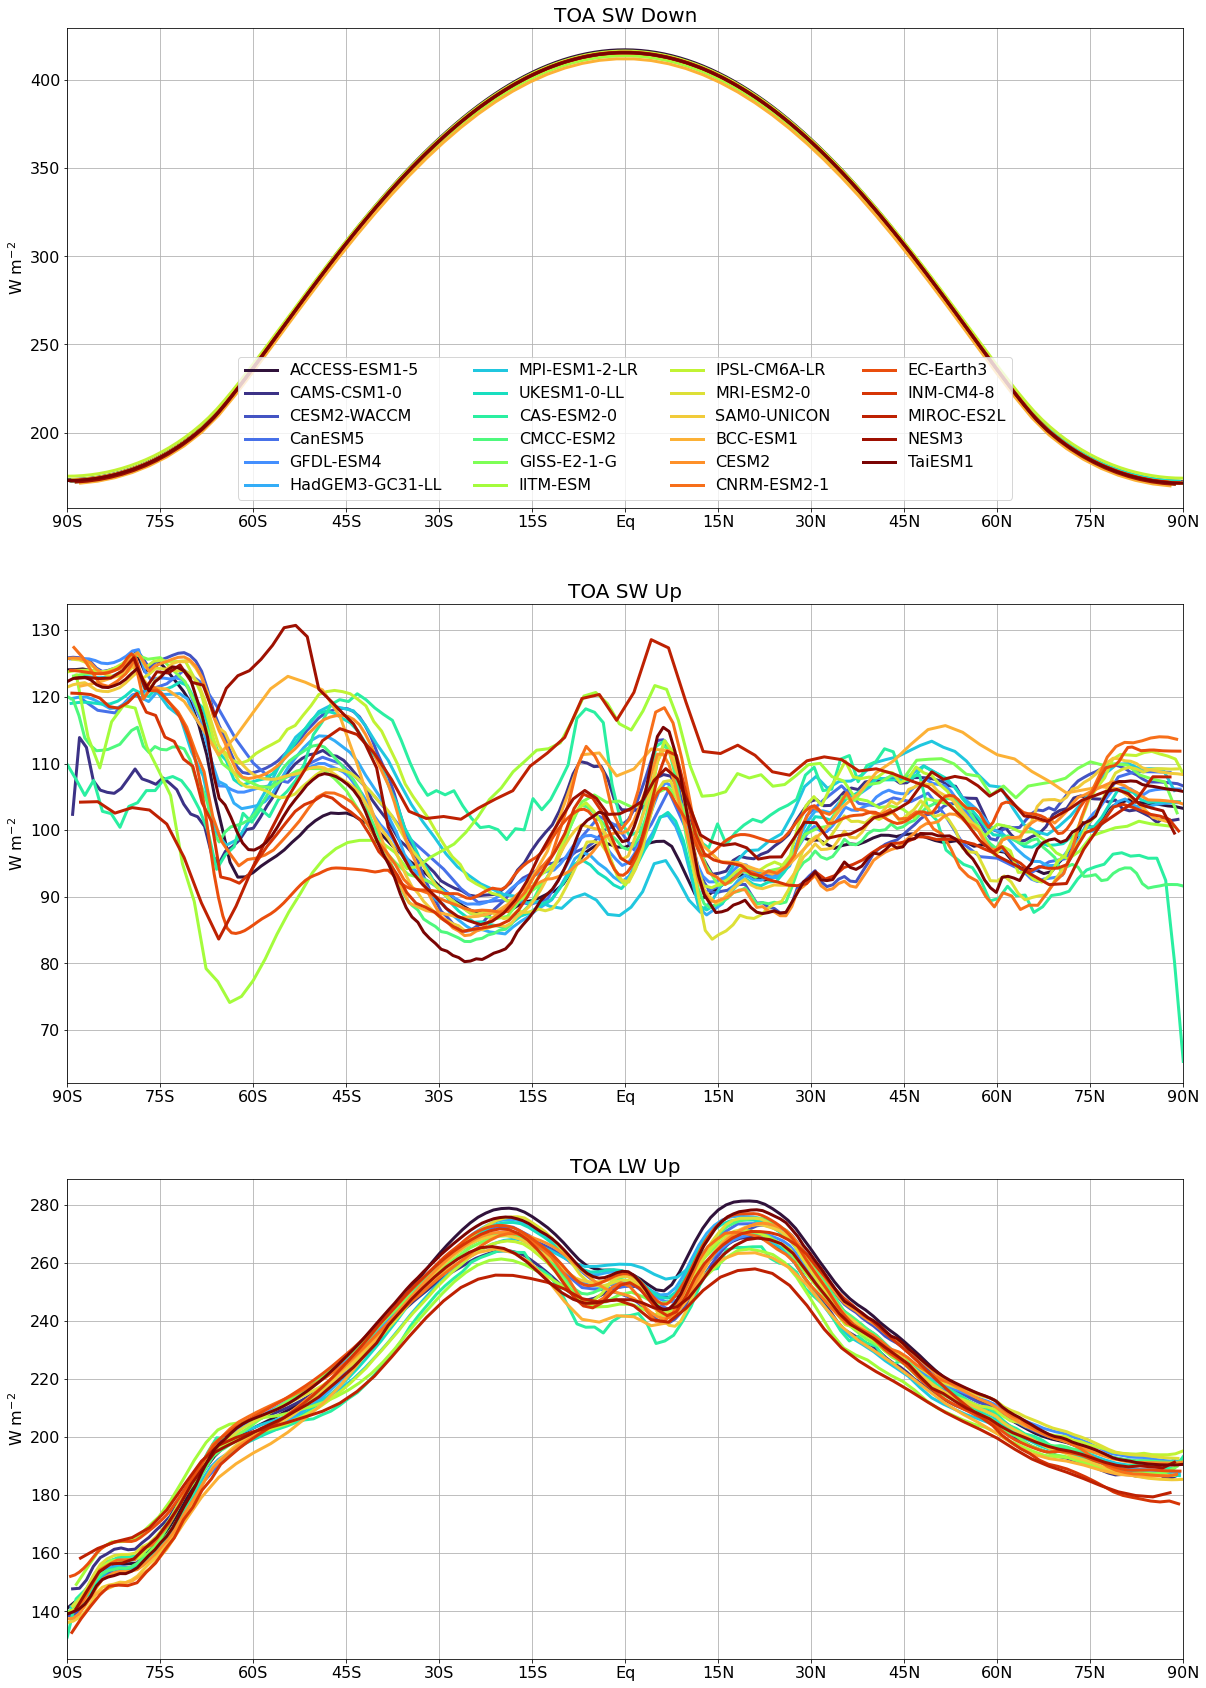

In [22]:
#Check fields!
fig = plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
PlotCMIP_ZL(lat, toaswd_C, 3, "TOA SW Down", "W m$^{-2}$")
plt.subplot(3,1,2)
PlotCMIP_ZL(lat, toaswu_C, False, "TOA SW Up", "W m$^{-2}$")
plt.subplot(3,1,3)
PlotCMIP_ZL(lat, toalwu_C, False, "TOA LW Up", "W m$^{-2}$")

In [23]:
print(toaswd_585)

{'ACCESS-ESM1-5': <xarray.DataArray 'rsdt' (lat: 145)>
array([173.33482, 173.42308, 173.68922, 174.13332, 174.7559 , 175.5592 ,
       176.546  , 177.72017, 179.08827, 180.65556, 182.42827, 184.41405,
       186.62187, 189.0634 , 191.75252, 194.7053 , 197.94344, 201.50024,
       205.43172, 209.88403, 214.9508 , 220.36101, 225.99733, 231.79102,
       237.69383, 243.66945, 249.68945, 255.7304 , 261.77274, 267.8002 ,
       273.7983 , 279.75464, 285.65817, 291.49902, 297.2683 , 302.95798,
       308.56058, 314.0694 , 319.47824, 324.78122, 329.9729 , 335.0483 ,
       340.00272, 344.83157, 349.53098, 354.09668, 358.52512, 362.81277,
       366.95633, 370.95267, 374.7988 , 378.49197, 382.02954, 385.40897,
       388.62796, 391.68436, 394.57608, 397.30106, 399.8577 , 402.24417,
       404.45895, 406.5007 , 408.36795, 410.0596 , 411.57468, 412.91208,
       414.07083, 415.05063, 415.85043, 416.46997, 416.90872, 417.16666,
       417.24332, 417.13892, 416.85336, 416.38675, 415.7396 , 414.912

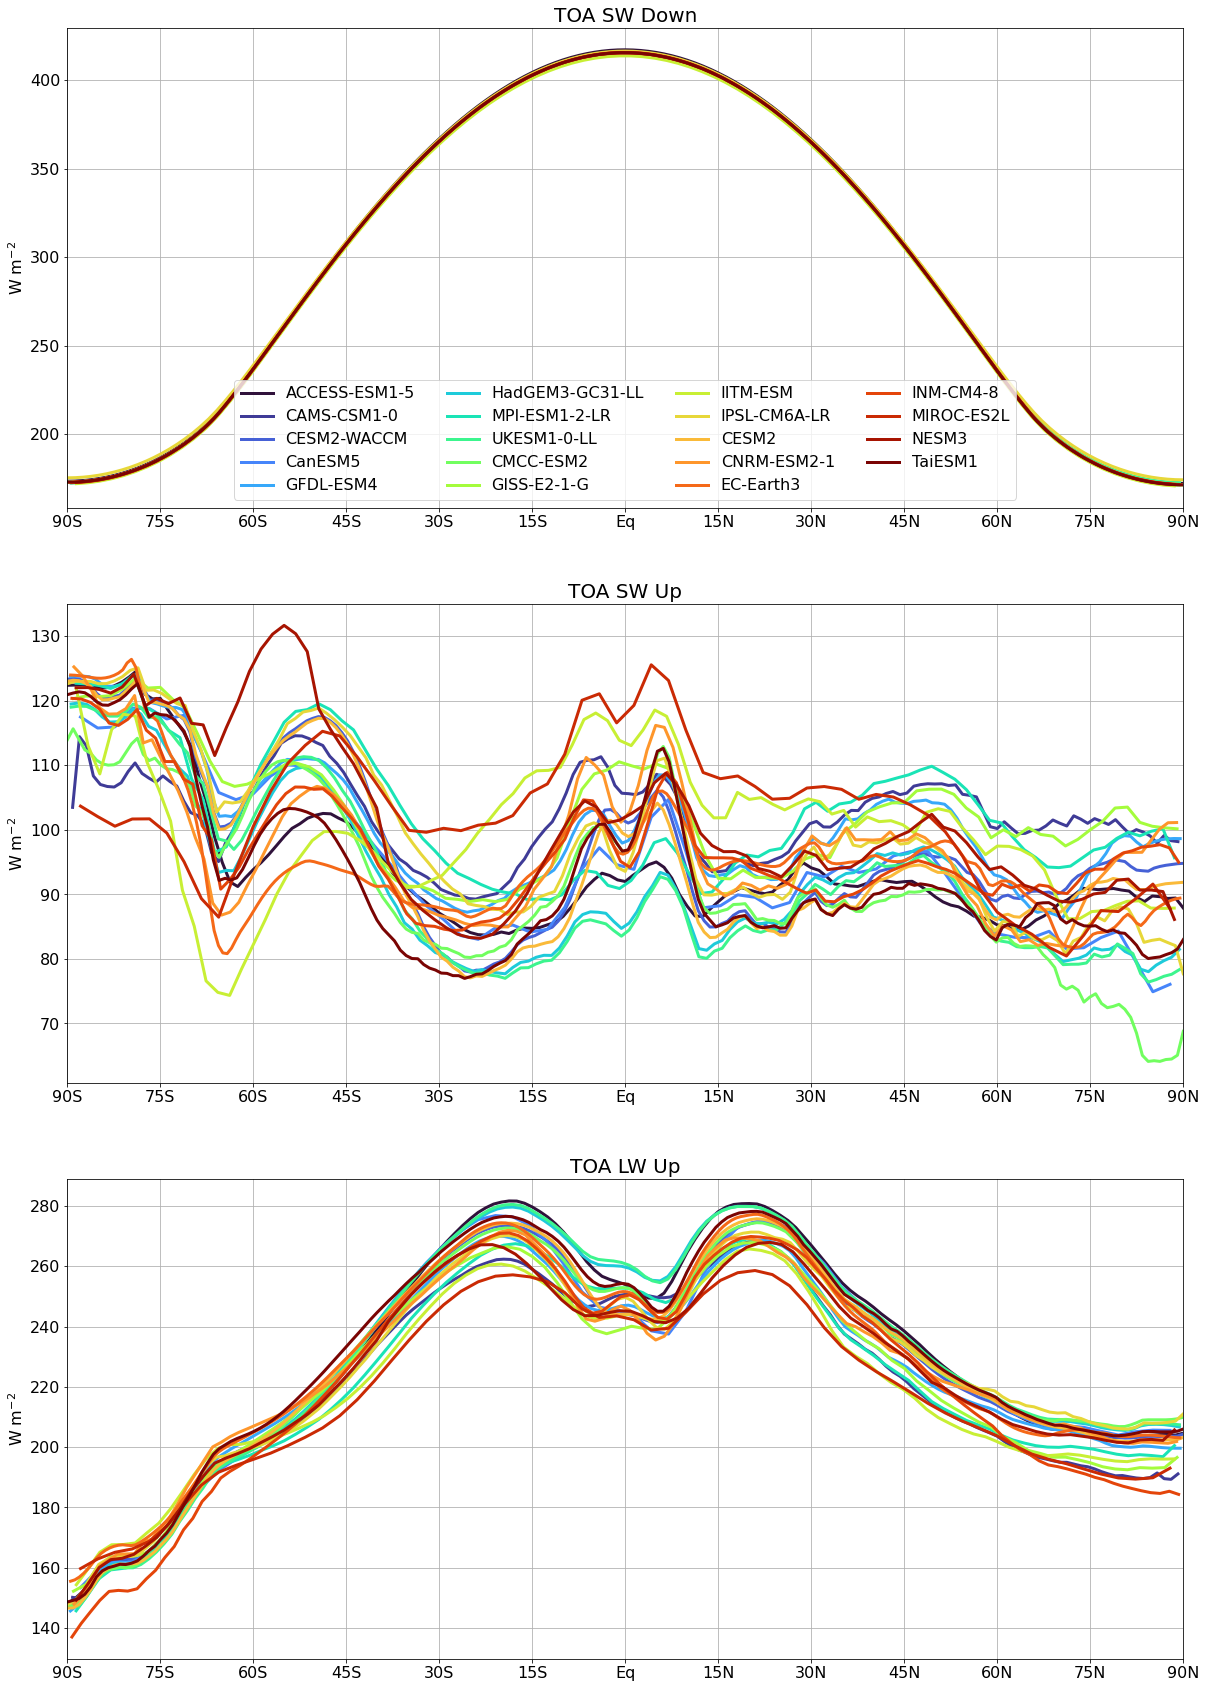

In [24]:
#Check fields!
fig = plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
PlotCMIP_ZL(lat, toaswd_585, 3, "TOA SW Down", "W m$^{-2}$")
plt.subplot(3,1,2)
PlotCMIP_ZL(lat, toaswu_585, False, "TOA SW Up", "W m$^{-2}$")
plt.subplot(3,1,3)
PlotCMIP_ZL(lat, toalwu_585, False, "TOA LW Up", "W m$^{-2}$")

In [27]:
OLR_C = toalwu_C
ASR_C = {}
OLR_585 = toalwu_585
ASR_585 = {}
OLR_anom = {}
ASR_anom = {}

for i in range(0,nmodel):
    if (mymodels[i] in toaswu_C) and (mymodels[i] in toaswd_C):
        ASR_C[mymodels[i]] = toaswd_C[mymodels[i]]-toaswu_C[mymodels[i]]
    if (mymodels[i] in toaswu_585) and (mymodels[i] in toaswd_585):
        ASR_585[mymodels[i]] = toaswd_585[mymodels[i]]-toaswu_585[mymodels[i]]
    if (mymodels[i] in ASR_C) and (mymodels[i] in ASR_585):
        ASR_anom[mymodels[i]] = ASR_585[mymodels[i]]-ASR_C[mymodels[i]]
    if (mymodels[i] in OLR_C) and (mymodels[i] in OLR_585):
        OLR_anom[mymodels[i]] = OLR_585[mymodels[i]]-OLR_C[mymodels[i]]

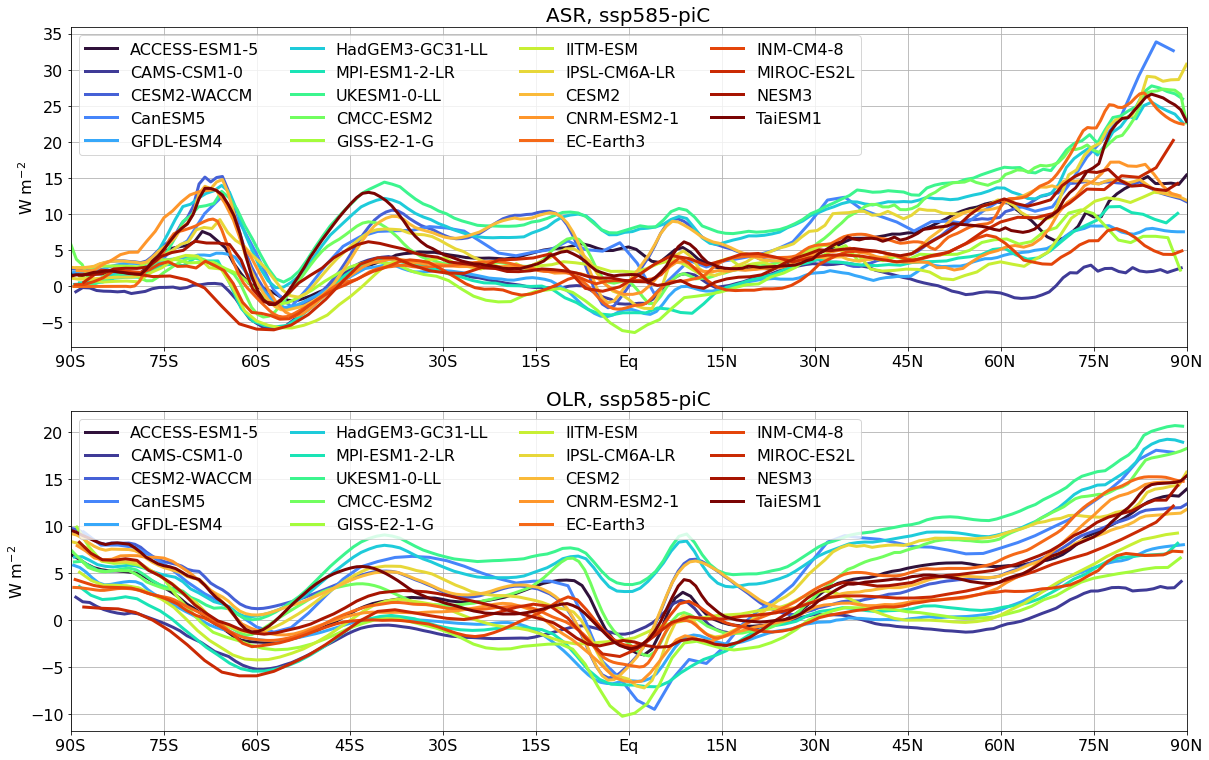

In [28]:
fig = plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
PlotCMIP_ZL(lat, ASR_anom, 3, "ASR, ssp585-piC", "W m$^{-2}$")
plt.subplot(3,1,2)
PlotCMIP_ZL(lat, OLR_anom, 3, "OLR, ssp585-piC", "W m$^{-2}$")